## Preparing Power Generation data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv('/content/power_actual.csv', parse_dates=['datetime'])
df.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


As we see that records in difference of 15 minutes each day so, we have to groupby data on minutes to form on hourly basis

In [ ]:
df.shape

(70080, 5)

In [ ]:
df = df.groupby([df['datetime'].dt.year,df['datetime'].dt.month,df['datetime'].dt.day, df['datetime'].dt.hour]).sum()
df[0:50]

<ipython-input-4-52df8ec231ba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby([df['datetime'].dt.year,df['datetime'].dt.month,df['datetime'].dt.day, df['datetime'].dt.hour]).sum()


Unnamed: 0  ghi  gti  power
datetime datetime datetime datetime                             
2017     10       1        0                  6  0.0  0.0   0.00
                           1                 22  0.0  0.0   0.00
                           2                 38  0.0  0.0   0.00
                           3                 54  0.0  0.0   0.00
                           4                 70  0.0  0.0   0.00
                           5                 86  0.0  0.0   0.00
                           6                102  0.0  0.0   0.08
                           7                118  0.0  0.0   4.77
                           8                134  0.0  0.0  20.55
                           9                150  0.0  0.0  32.90
                           10               166  0.0  0.0  43.42
                           11               182  0.0  0.0  50.44
                           12               198  0.0  0.0  51.59
                           13               214  0.0  0.0  47.95
                           14               230  0.0  0.0  40.48
                           15               246  0.0  0.0  27.45
                           16               262  0.0  0.0  10.28
                           17               278  0.0  0.0   0.93
                           18               294  0.0  0.0   0.00
                           19               310  0.0  0.0   0.00
                           20               326  0.0  0.0   0.00
                           21               342  0.0  0.0   0.00
                           22               358  0.0  0.0   0.00
                           23               374  0.0  0.0   0.00
                  2        0                390  0.0  0.0   0.00
                           1                406  0.0  0.0   0.00
                           2                422  0.0  0.0   0.00
                           3                438  0.0  0.0   0.00
                           4                454  0.0  0.0   0.00
                           5                470  0.0  0.0   0.00
                           6                486  0.0  0.0   0.08
                           7                502  0.0  0.0   4.77
                           8                518  0.0  0.0  20.55
                           9                534  0.0  0.0  32.90
                           10               550  0.0  0.0  43.42
                           11               566  0.0  0.0  50.44
                           12               582  0.0  0.0  51.59
                           13               598  0.0  0.0  47.95
                           14               614  0.0  0.0  40.48
                           15               630  0.0  0.0  27.45
                           16               646  0.0  0.0  10.28
                           17               662  0.0  0.0   0.93
                           18               678  0.0  0.0   0.00
                           19               694  0.0  0.0   0.00
                           20               710  0.0  0.0   0.00
                           21               726  0.0  0.0   0.00
                           22               742  0.0  0.0   0.00
                           23               758  0.0  0.0   0.00
                  3        0                774  0.0  0.0   0.00
                           1                790  0.0  0.0   0.00

This is what we grouping the data on a year of month of day of hour by applying summation to form data as expected

In [ ]:
df.tail(50)

Unnamed: 0  ghi  gti  power
datetime datetime datetime datetime                             
2019     9        28       22            279526  0.0  0.0   0.00
                           23            279542  0.0  0.0   0.00
                  29       0             279558  0.0  0.0   0.00
                           1             279574  0.0  0.0   0.00
                           2             279590  0.0  0.0   0.00
                           3             279606  0.0  0.0   0.00
                           4             279622  0.0  0.0   0.00
                           5             279638  0.0  0.0   0.00
                           6             279654  0.0  0.0   0.10
                           7             279670  0.0  0.0   4.57
                           8             279686  0.0  0.0  19.21
                           9             279702  0.0  0.0  38.67
                           10            279718  0.0  0.0  43.53
                           11            279734  0.0  0.0   0.00
                           12            279750  0.0  0.0  29.94
                           13            279766  0.0  0.0  44.71
                           14            279782  0.0  0.0  32.79
                           15            279798  0.0  0.0  20.53
                           16            279814  0.0  0.0  16.13
                           17            279830  0.0  0.0   2.45
                           18            279846  0.0  0.0   0.00
                           19            279862  0.0  0.0   0.00
                           20            279878  0.0  0.0   0.00
                           21            279894  0.0  0.0   0.00
                           22            279910  0.0  0.0   0.00
                           23            279926  0.0  0.0   0.00
                  30       0             279942  0.0  0.0   0.00
                           1             279958  0.0  0.0   0.00
                           2             279974  0.0  0.0   0.00
                           3             279990  0.0  0.0   0.00
                           4             280006  0.0  0.0   0.00
                           5             280022  0.0  0.0   0.00
                           6             280038  0.0  0.0   0.00
                           7             280054  0.0  0.0   0.00
                           8             280070  0.0  0.0   0.00
                           9             280086  0.0  0.0   0.00
                           10            280102  0.0  0.0   0.00
                           11            280118  0.0  0.0   0.00
                           12            280134  0.0  0.0   0.00
                           13            280150  0.0  0.0   0.00
                           14            280166  0.0  0.0   0.00
                           15            280182  0.0  0.0   0.00
                           16            280198  0.0  0.0   0.00
                           17            280214  0.0  0.0   0.00
                           18            280230  0.0  0.0   0.00
                           19            280246  0.0  0.0   0.00
                           20            280262  0.0  0.0   0.00
                           21            280278  0.0  0.0   0.00
                           22            280294  0.0  0.0   0.00
                           23            280310  0.0  0.0   0.00

In [ ]:
print(df.power)

datetime  datetime  datetime  datetime
2017      10        1         0           0.0
                              1           0.0
                              2           0.0
                              3           0.0
                              4           0.0
                                         ... 
2019      9         30        19          0.0
                              20          0.0
                              21          0.0
                              22          0.0
                              23          0.0
Name: power, Length: 17520, dtype: float64


In [ ]:
df.index[0:][0]

(2017, 10, 1, 0)

In [ ]:
df1 = pd.DataFrame({'year':[i for i,j,k,l in df.index],
                  'month':[j for i,j,k,l in df.index],
                  'day':[k for i,j,k,l in df.index],
                  'hour':[l for i,j,k,l in df.index]})
df1 = pd.to_datetime(df1)
df1

0       2017-10-01 00:00:00
1       2017-10-01 01:00:00
2       2017-10-01 02:00:00
3       2017-10-01 03:00:00
4       2017-10-01 04:00:00
                ...        
17515   2019-09-30 19:00:00
17516   2019-09-30 20:00:00
17517   2019-09-30 21:00:00
17518   2019-09-30 22:00:00
17519   2019-09-30 23:00:00
Length: 17520, dtype: datetime64[ns]

In [ ]:
df = pd.DataFrame({'datetime': df1, 'power': [i for i in df.power]})
df[0:100]

,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 01:00:00,0.0
2,2017-10-01 02:00:00,0.0
3,2017-10-01 03:00:00,0.0
4,2017-10-01 04:00:00,0.0
...,...,...
95,2017-10-04 23:00:00,0.0
96,2017-10-05 00:00:00,0.0
97,2017-10-05 01:00:00,0.0
98,2017-10-05 02:00:00,0.0


In [ ]:
df.shape

(17520, 2)

### Predictors over time

                datetime  power
1    2017-10-01 01:00:00    0.0
2    2017-10-01 02:00:00    0.0
3    2017-10-01 03:00:00    0.0
4    2017-10-01 04:00:00    0.0
5    2017-10-01 05:00:00    0.0
...                  ...    ...
2180 2017-12-30 20:00:00    0.0
2181 2017-12-30 21:00:00    0.0
2182 2017-12-30 22:00:00    0.0
2183 2017-12-30 23:00:00    0.0
2184 2017-12-31 00:00:00    0.0

[2184 rows x 2 columns]


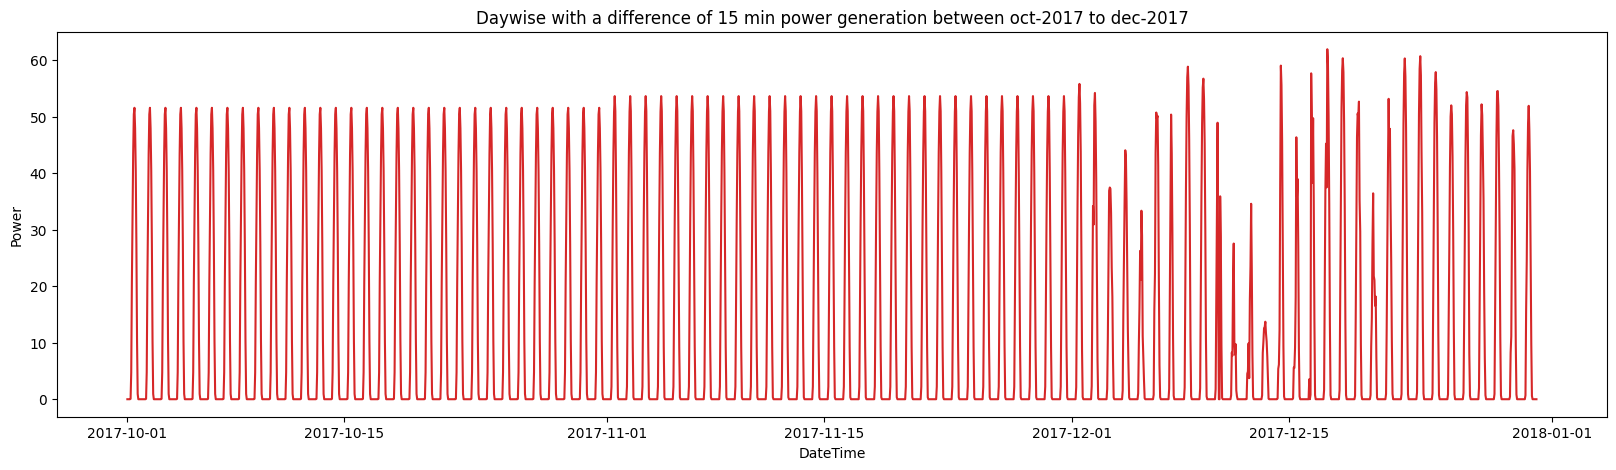

In [ ]:
start_date = '2017-10-01'
end_date = '2017-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017')

Clearly, Power plant would generate power daily increasing from `06:00:00` decreasing to `17:00:00`, As we see this is series of data repeting same structure daily

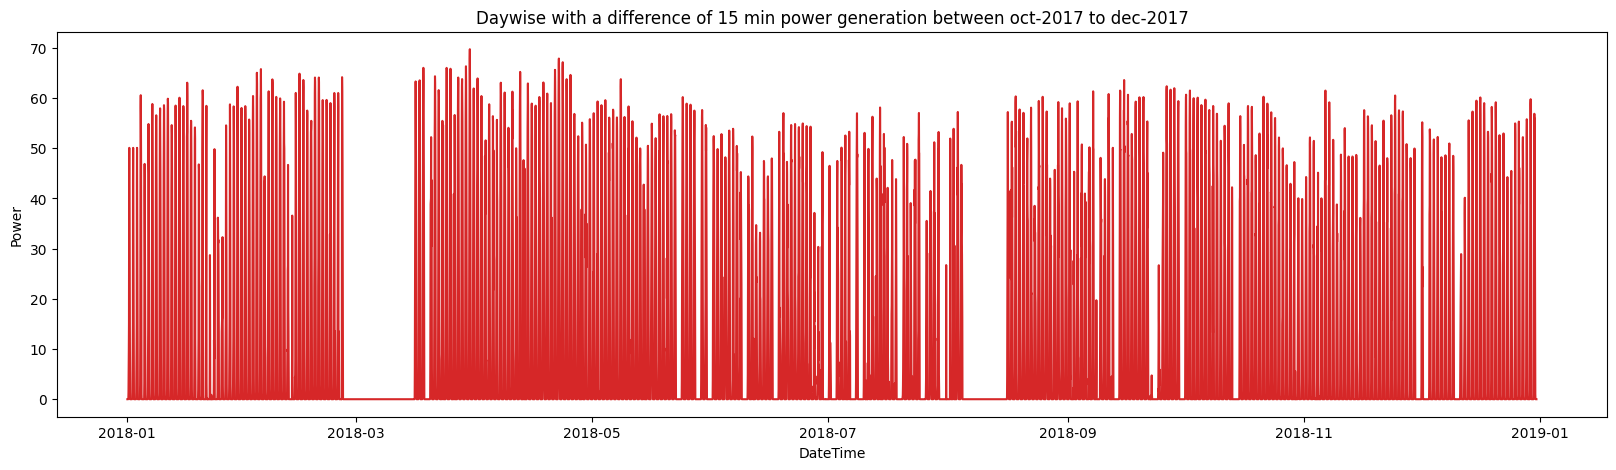

In [ ]:
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
# df_mask
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017')

                 datetime  power
10969 2019-01-01 01:00:00    0.0
10970 2019-01-01 02:00:00    0.0
10971 2019-01-01 03:00:00    0.0
10972 2019-01-01 04:00:00    0.0
10973 2019-01-01 05:00:00    0.0
...                   ...    ...
15308 2019-06-30 20:00:00    0.0
15309 2019-06-30 21:00:00    0.0
15310 2019-06-30 22:00:00    0.0
15311 2019-06-30 23:00:00    0.0
15312 2019-07-01 00:00:00    0.0

[4344 rows x 2 columns]


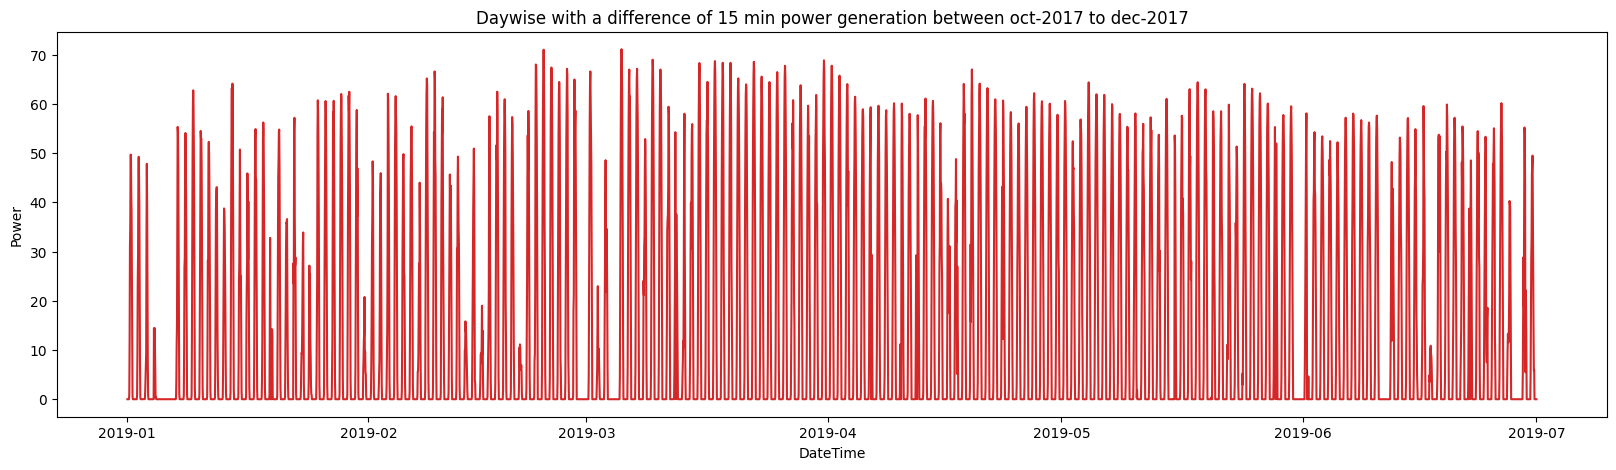

In [ ]:
start_date = '2019-01-01'
end_date = '2019-07-01'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017')

                 datetime  power
15841 2019-07-23 01:00:00    0.0
15842 2019-07-23 02:00:00    0.0
15843 2019-07-23 03:00:00    0.0
15844 2019-07-23 04:00:00    0.0
15845 2019-07-23 05:00:00    0.0
...                   ...    ...
16508 2019-08-19 20:00:00    0.0
16509 2019-08-19 21:00:00    0.0
16510 2019-08-19 22:00:00    0.0
16511 2019-08-19 23:00:00    0.0
16512 2019-08-20 00:00:00    0.0

[672 rows x 2 columns]


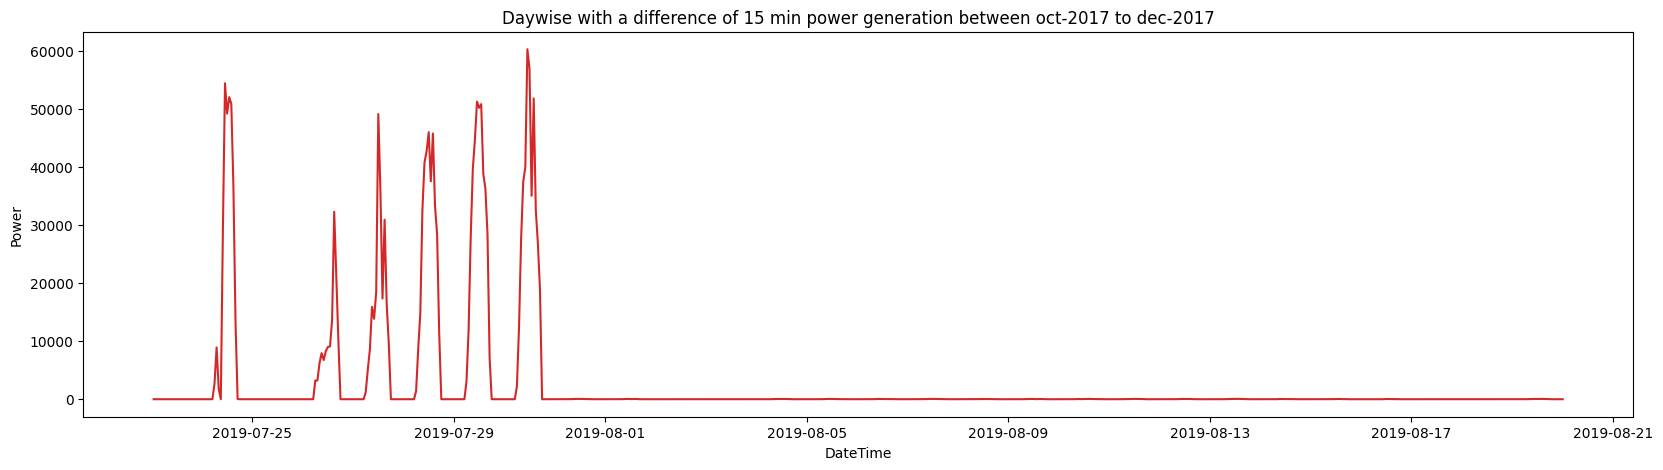

In [ ]:
start_date = '2019-07-23'
end_date = '2019-08-20'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017')

outliers also having the same series of power generation, values ranging from `0-60000`

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

## Data Preparation

### Removing extra rows

In [ ]:
print(df.shape)
df_weather_actual = pd.read_csv('/content/weather_actuals.csv')
print(df_weather_actual.shape)

(13619, 2)
(13619, 31)


this shows feature records are less than power records we take a clear look on data `df_weather_actual` doesn't having records from `2018-03-13 00:00:00` to `2018-08-15 12:00:00` and `2018-02-28 00:00:00'` to `2018-03-06 23:00:00`

In [ ]:
start_date = '2018-03-12 23:00:00'
end_date = '2018-08-15 13:00:00'
df_drop_extra_rows = df
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]
print(df_mask)

Empty DataFrame
Columns: [datetime, power]
Index: []


In [ ]:
df_drop_extra_rows.drop(df_mask.index, inplace=True)

In [ ]:
start_date = '2018-02-27 23:00:00'
end_date = '2018-03-07 00:00:00'
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]
# print(df_mask.shape)
df_drop_extra_rows.drop(df_mask.index, inplace=True)

# mask = (df_weather_actual.datetime_local >= start_date) & (df_weather_actual.datetime_local <= end_date)
# df_mask = df_weather_actual.loc[mask]
# print(df_mask.shape)

In [ ]:
df_drop_extra_rows

,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 01:00:00,0.0
2,2017-10-01 02:00:00,0.0
3,2017-10-01 03:00:00,0.0
4,2017-10-01 04:00:00,0.0
...,...,...
17515,2019-09-30 19:00:00,0.0
17516,2019-09-30 20:00:00,0.0
17517,2019-09-30 21:00:00,0.0
17518,2019-09-30 22:00:00,0.0


In [ ]:
print(df_drop_extra_rows.shape)
df_weather_actual = pd.read_csv('/content/weather_actuals.csv')
print(df_weather_actual.shape)

(13619, 2)
(13619, 31)


now we having some number of rows for features and power

In [ ]:
# Save to a new csv file
df_drop_extra_rows.to_csv('power_actual_filter_rows.csv', index = False, header = True)

In [ ]:
df_weather_actual.dtypes

Unnamed: 0                int64
plant_id                  int64
datetime_utc             object
datetime_local           object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_chill              float64
wind_gust               float64
heat_index              float64
pressure                float64
qpf                     float64
uv_index                  int64
snow                    float64
pop                     float64
fctcode                 float64
ozone                   float64
precip_accumulation     float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at               object
dtype: o

### Removing null column and rows if any

In [ ]:
df_weather_actual.isna().sum()

Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64

In [ ]:
df_weather_actual = df_weather_actual.drop(columns=['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation','precip_type'])
df_weather_actual.shape

(13619, 23)

In [ ]:
import numpy as np
df_weather_actual.replace(to_replace = -9999, value =np.nan, inplace=True)

In [ ]:
num_cols = ['cloud_cover','wind_bearing','wind_speed','wind_gust','pressure','uv_index','ozone','precip_intensity','precip_intensity','precip_probability','visibility']

In [ ]:
def replace_missing_numeral(cols):
    for col in cols:
        med = df_weather_actual[col].median()
        df_weather_actual[col].replace(to_replace = np.nan, value =med, inplace=True)

replace_missing_numeral(num_cols)

In [ ]:
print(df_weather_actual.isna().sum())

Unnamed: 0              0
plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64


In [ ]:
# df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

In [ ]:
df_weather_actual['power'] = df_drop_extra_rows['power']
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

In [ ]:
print(df_weather_actual.isna().sum())

Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_gust                  0
pressure                   0
uv_index                   0
ozone                      0
precip_intensity           0
precip_probability         0
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
power                   3901
dtype: int64


In [ ]:
import pandas as pd

# Assuming df_weather_actual is your DataFrame

# Drop rows with null values in the 'power' column
df_weather_actual.dropna(subset=['power'], inplace=True)

# Save the modified DataFrame to a CSV file
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index=False, header=True)


In [ ]:
print(df_weather_actual.isna().sum())

Unnamed: 0              0
plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
power                   0
dtype: int64


In [ ]:
import pandas as pd
df_weather_actual = pd.read_csv('/content/weather_actuals_prepared1 (3).csv')
df_drop_extra_rows = pd.read_csv('/content/power_actual_filter_rows.csv')

In [ ]:
df_weather_actual.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,12.578598
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,19.416265
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,23.805000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,71.090000


`power` having outliers as maximum power is `60366.74` which is far away from mean `43.91`

As we are see that `power` is having outliers of 60366.74 or more which will affect to our model so we have to remove this outlier. for now we are replacing outlier with previous day data, if we are going to see the data the power generation happens daily from `06:00:00` to `17:00:00` means every day data was generated in this time interval only so replaced each outlier data with previous some day from `06:00:00` to `17:00:00`

In [ ]:
mask = (df_weather_actual.datetime_local >= '2019-07-15 06:00:00') & (df_weather_actual.datetime_local <= '2019-07-15 17:00:00')
df_replace_outlier = df_weather_actual[mask]
print(df_replace_outlier['power'])
df_drop_extra_rows.drop(df_mask.index, inplace=True)

mask = (df_weather_actual.datetime_local >= start_date) & (df_weather_actual.datetime_local <= end_date)
df_mask = df_weather_actual.loc[mask]
print(df_mask.shape)

11753     1.90
11754     7.83
11755    14.68
11756    16.40
11757    15.49
11758     3.97
11759     1.30
11760    17.69
11761    46.12
11762    35.68
11763    24.46
11764    12.15
Name: power, dtype: float64
(12, 24)


In [ ]:
outliers_date = ['2019-07-24', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30']

for date in outliers_date:
    from_datetime = date + ' 06:00:00'
    to_datetime = date + ' 17:00:00'
    mask = (df_weather_actual.datetime_local >= from_datetime) & (df_weather_actual.datetime_local <= to_datetime)
    df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]
    print(df_weather_actual['power'].loc[mask])


11969     1.90
11970     7.83
11971    14.68
11972    16.40
11973    15.49
11974     3.97
11975     1.30
11976    17.69
11977    46.12
11978    35.68
11979    24.46
11980    12.15
Name: power, dtype: float64
12017     1.90
12018     7.83
12019    14.68
12020    16.40
12021    15.49
12022     3.97
12023     1.30
12024    17.69
12025    46.12
12026    35.68
12027    24.46
12028    12.15
Name: power, dtype: float64
12041     1.90
12042     7.83
12043    14.68
12044    16.40
12045    15.49
12046     3.97
12047     1.30
12048    17.69
12049    46.12
12050    35.68
12051    24.46
12052    12.15
Name: power, dtype: float64
12065     1.90
12066     7.83
12067    14.68
12068    16.40
12069    15.49
12070     3.97
12071     1.30
12072    17.69
12073    46.12
12074    35.68
12075    24.46
12076    12.15
Name: power, dtype: float64
12089     1.90
12090     7.83
12091    14.68
12092    16.40
12093    15.49
12094     3.97
12095     1.30
12096    17.69
12097    46.12
12098    35.68
12099    24.46
121

<ipython-input-75-75974a2aab4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]


In [ ]:
df_weather_actual.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,12.578598
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,19.416265
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,23.805000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,71.090000


In [ ]:
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

now outliers are removed

## Exploratory data analysis

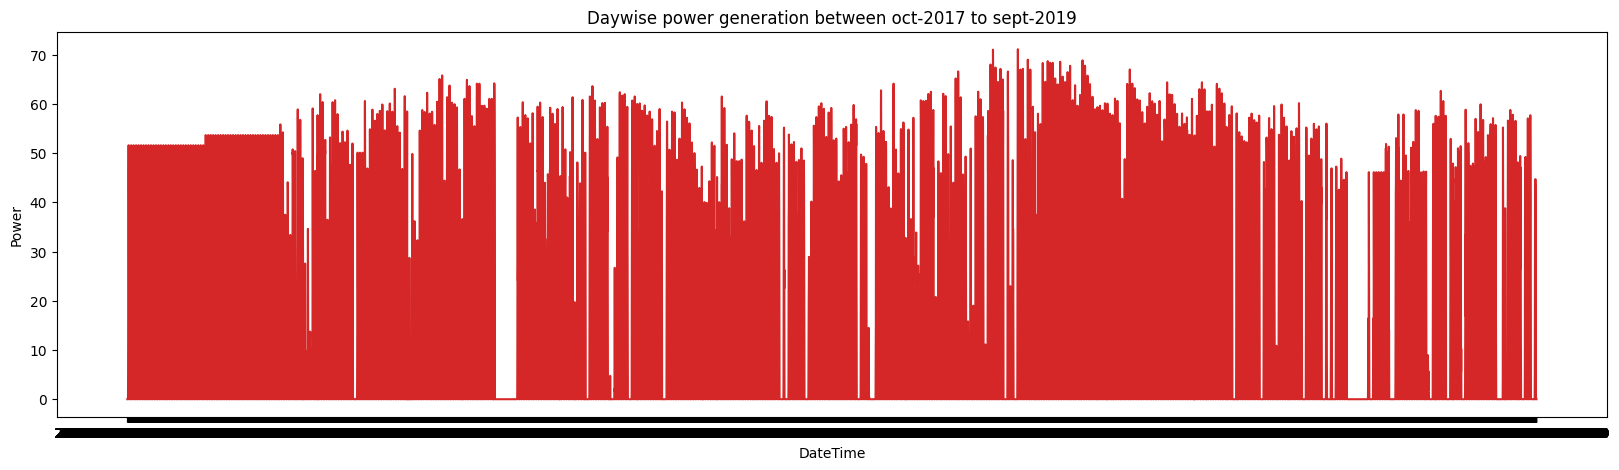

In [ ]:
start_date = '2017-10-01'
end_date = '2019-09-30'
mask = (df_weather_actual.datetime_local > start_date) & (df_weather_actual.datetime_local <= end_date)
df_mask = df_weather_actual.loc[mask]
plot_df(df_mask, x=df_mask.datetime_local, y=df_mask.power, title='Daywise power generation between oct-2017 to sept-2019')

### EDA for numerical features

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


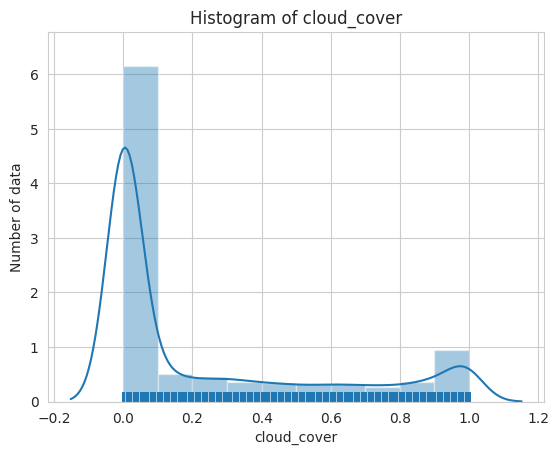

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


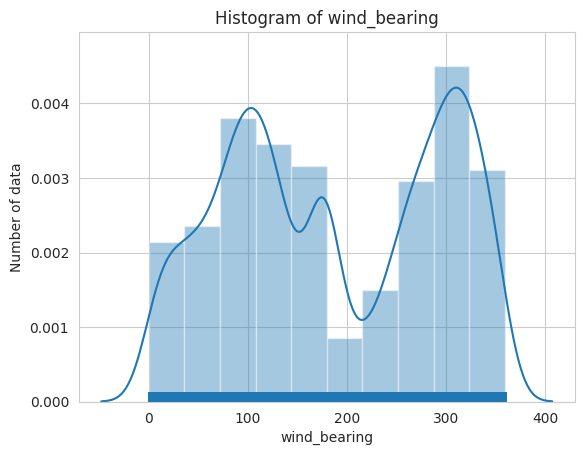

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


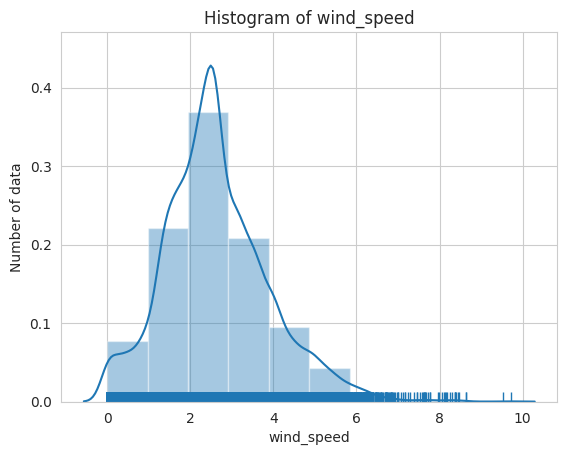

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


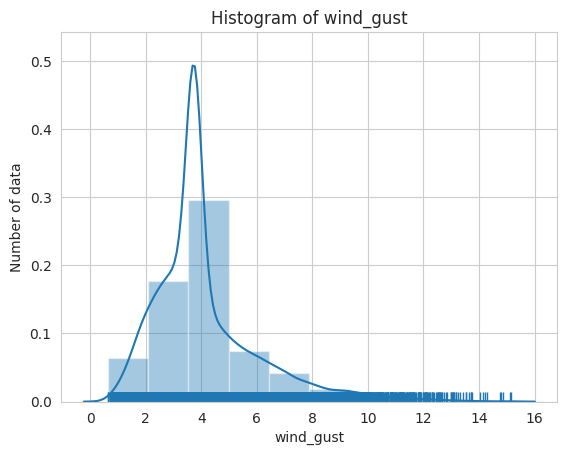

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


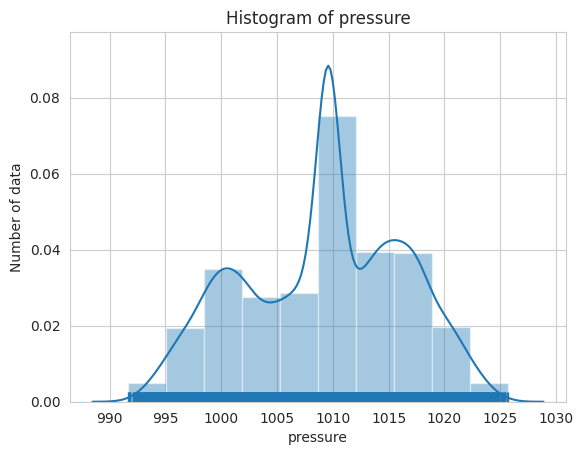

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


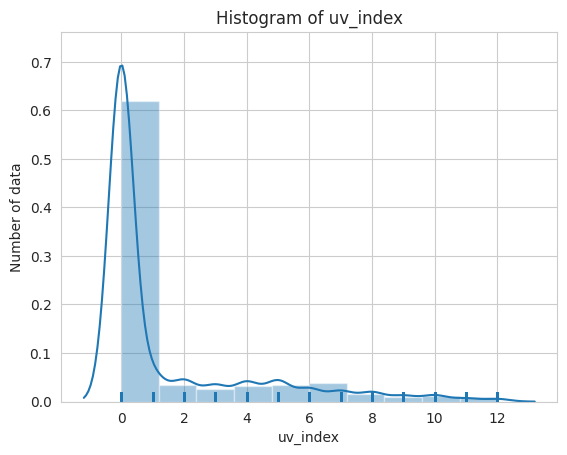

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


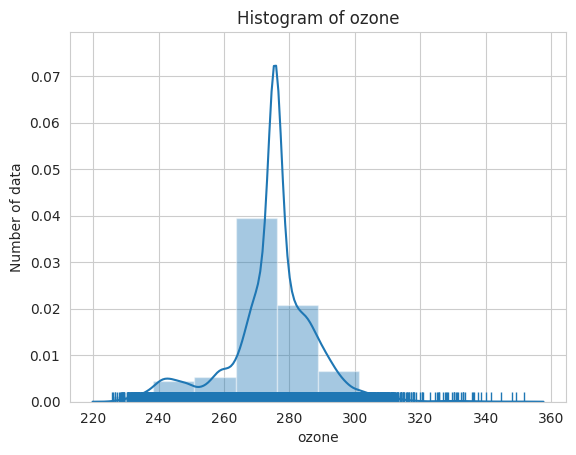

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


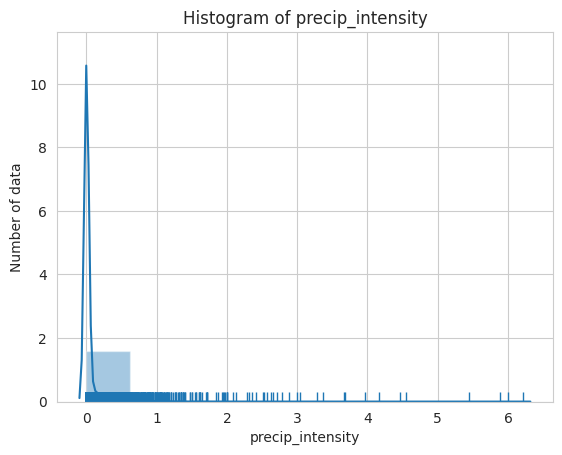

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


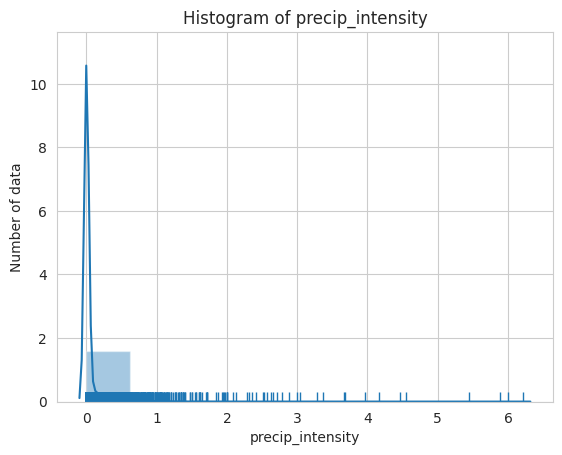

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


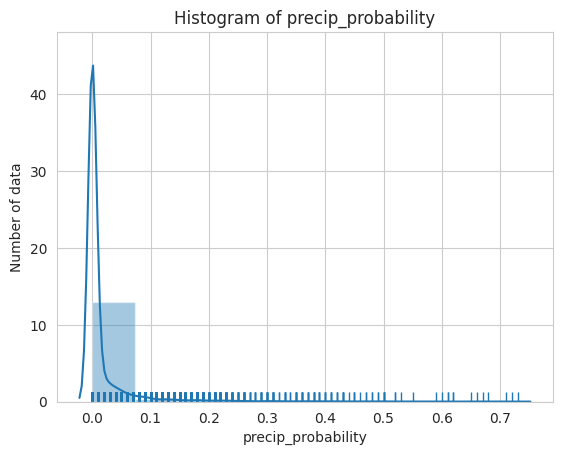

<ipython-input-79-651bd929043b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)


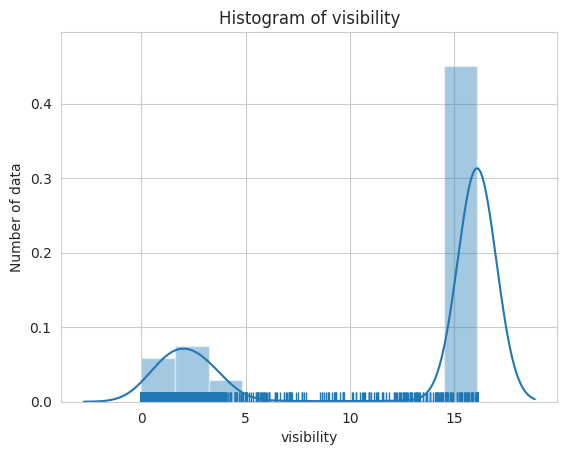

In [ ]:
def plot_density_hist(df_weather_actual, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of data')# Set text for y axis
        plt.show()

plot_density_hist(df_weather_actual, num_cols, hist=True)

1. cloud_cover, wind_speed, wind_gust, uv_index, precip_intensiy, precip_probability all are right skewed
2. visibility, wind_bearing and some extend cloud_cover having 2 different mean values
3. precip_intensity and precip_probability having similar kind of graph we can assume that take any one of them while feature selection

<ipython-input-80-ff3e934907a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


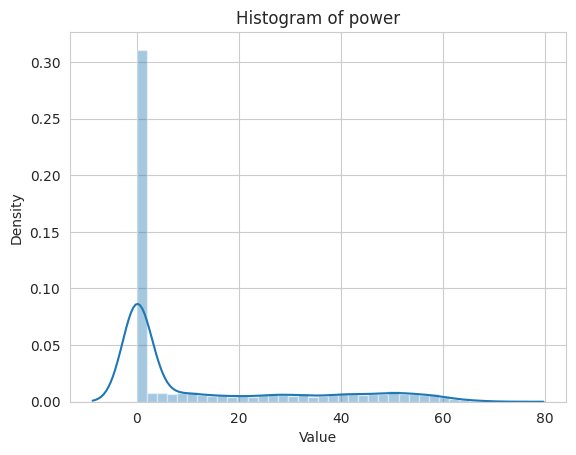

In [ ]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

#labels = np.array(auto_prices['price'])
hist_plot(df_weather_actual['power'], 'power')

here we see power generation is highly right skewed

### EDA for categorical features

<ipython-input-81-72482cdd910c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


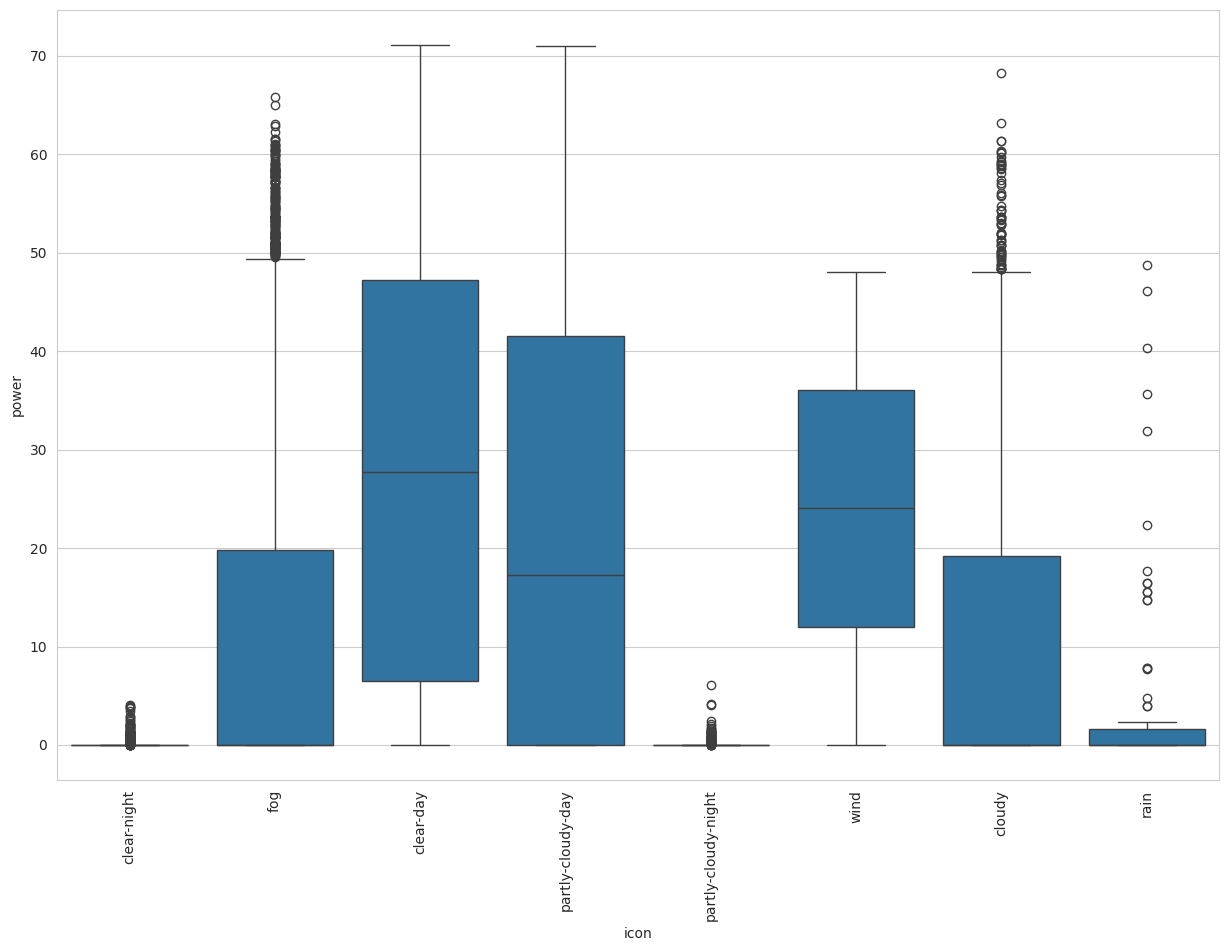

<ipython-input-81-72482cdd910c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


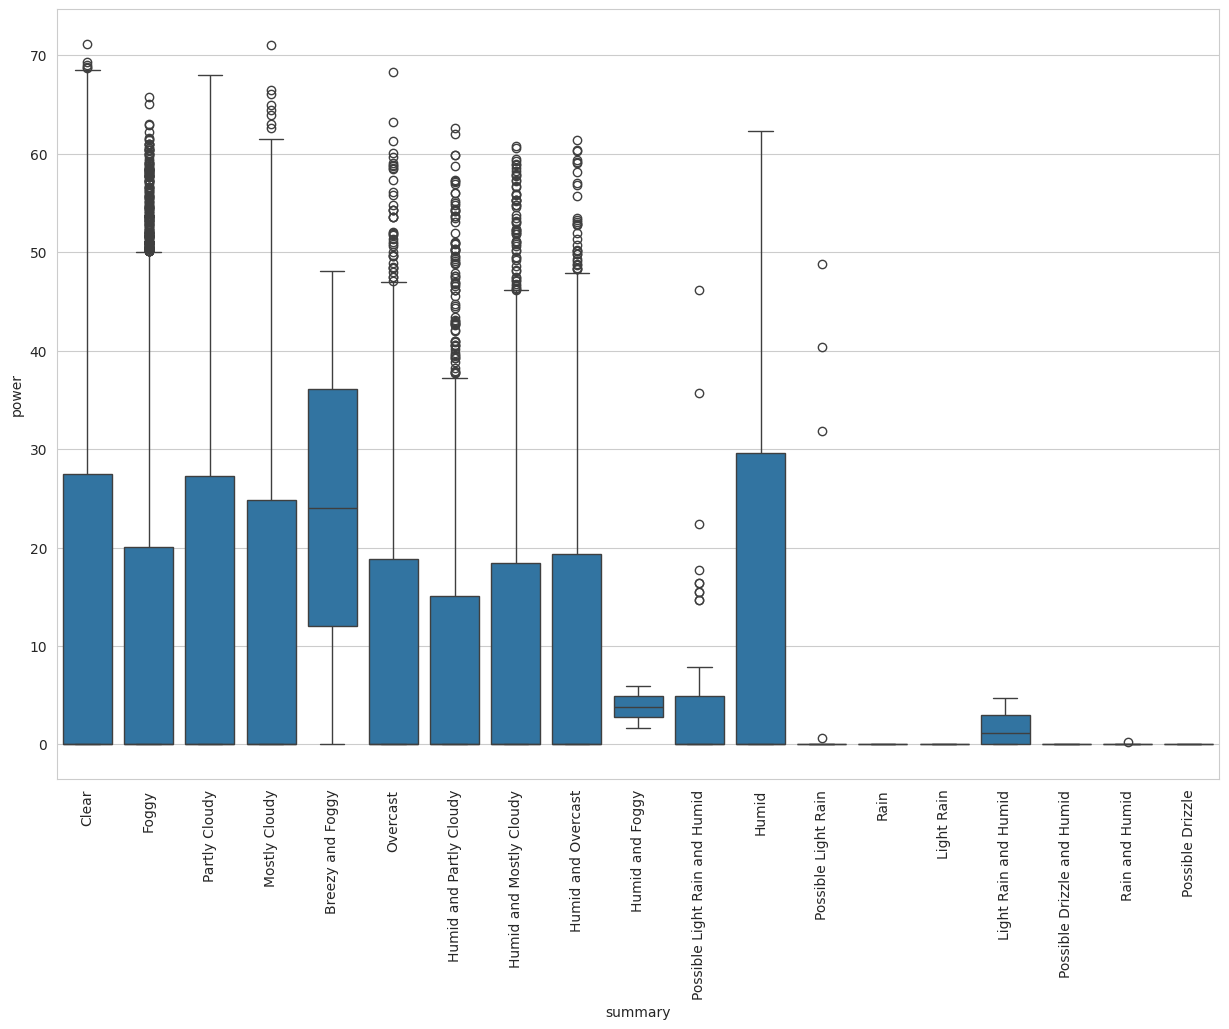

<ipython-input-81-72482cdd910c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


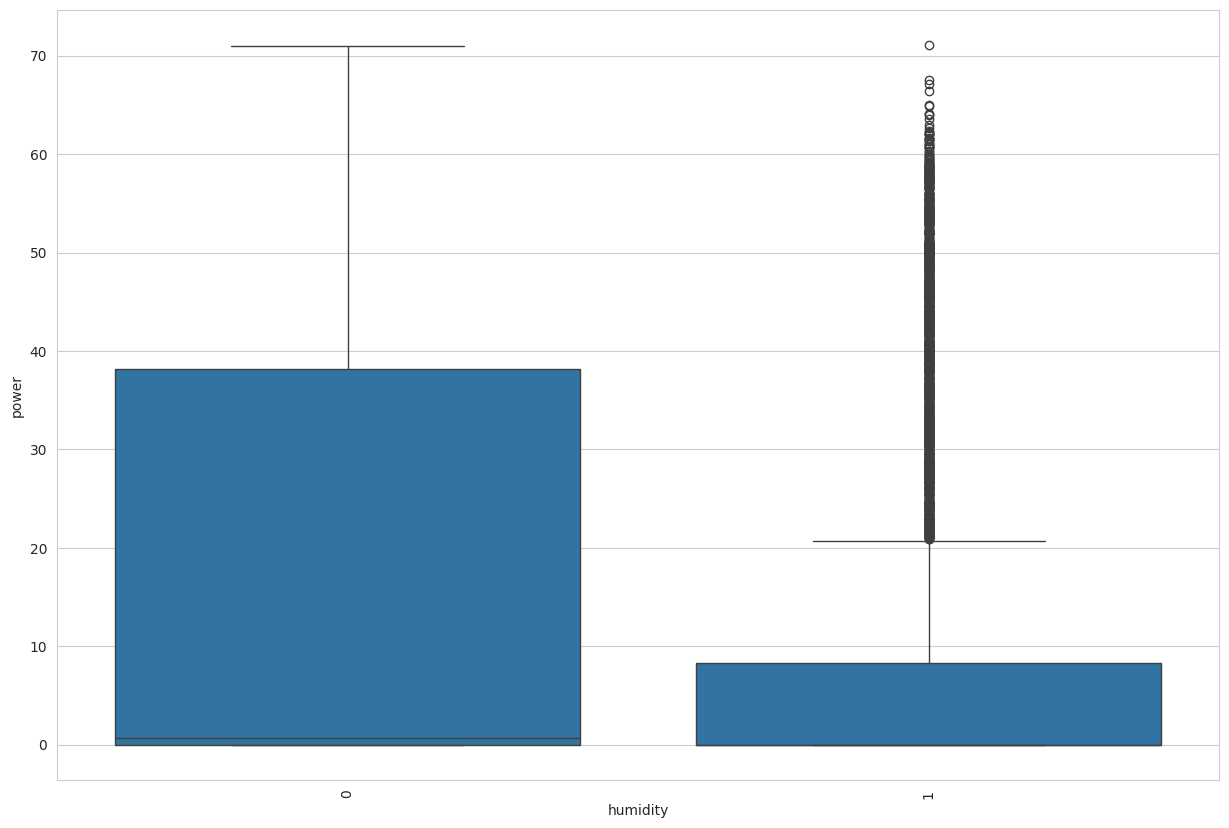

In [ ]:
def plot_box(df_weather_actual, cols, col_y = 'power'):
  for col in cols:
    _ = plt.figure(figsize = (15,10))
    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df_weather_actual, x=col, y=col_y, orient='v')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()

cat_cols = ['icon','summary','humidity']
plot_box(df_weather_actual, cat_cols)

`icon` categories expected to perform well while model building because all the categoies having different behaviour towards power generation.     
`summary` can do predict but not at that extend as `icon` because most of the categories having same boxplots means similar bveaviour towards power.            
`humidity` is important as 0,1 seems to play different job on power

In [ ]:
# Finding the IQR
percentile25 = df_weather_actual[['cloud_cover', 'humidity']].quantile(0.25)
percentile75 = df_weather_actual[['cloud_cover', 'humidity']].quantile(0.75)


In [ ]:
percentile75

cloud_cover    0.41
humidity       1.00
Name: 0.75, dtype: float64

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

cloud_cover    0.41
humidity       1.00
dtype: float64

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr



In [ ]:
print("Upper limit",upper_limit)
print("Lower limit", lower_limit)

Upper limit cloud_cover    1.025
humidity       2.500
dtype: float64
Lower limit cloud_cover   -0.615
humidity      -1.500
dtype: float64


In [ ]:
filtered_df_weather_actual = df_weather_actual[(df_weather_actual['cloud_cover'] > upper_limit) & (df_weather_actual['humidity'] > upper_limit)]

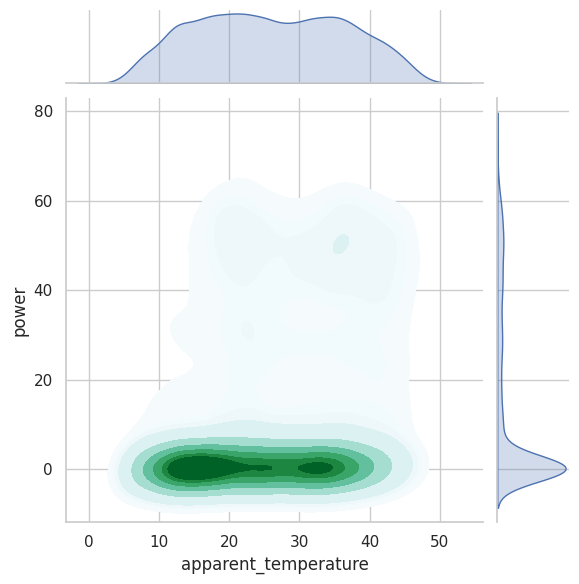

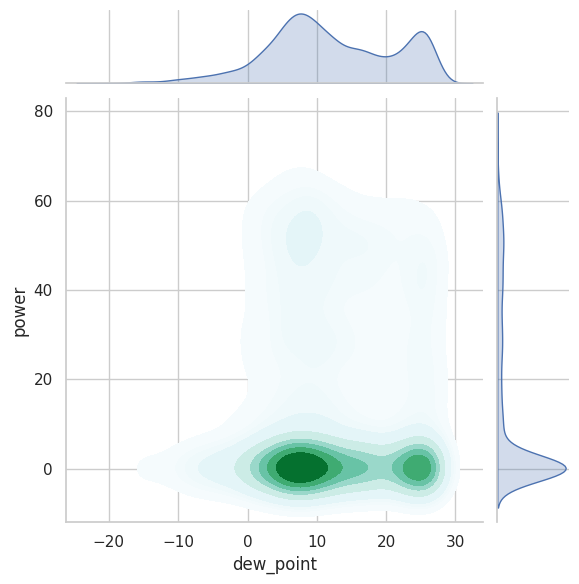

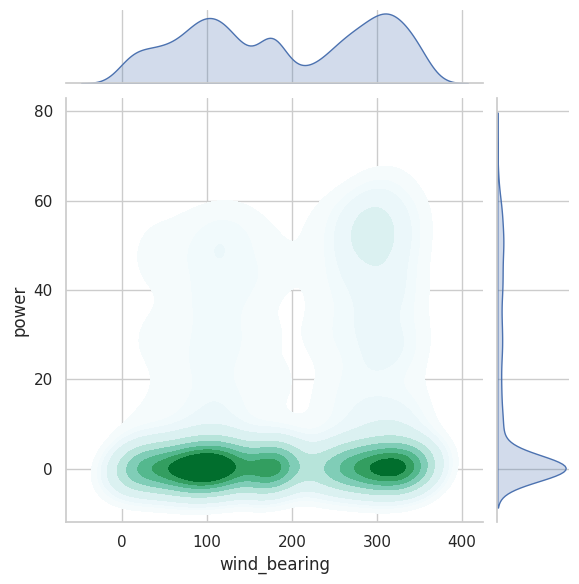

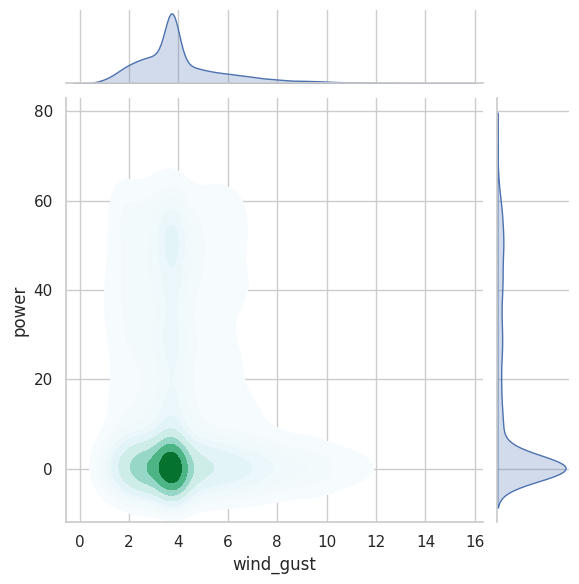

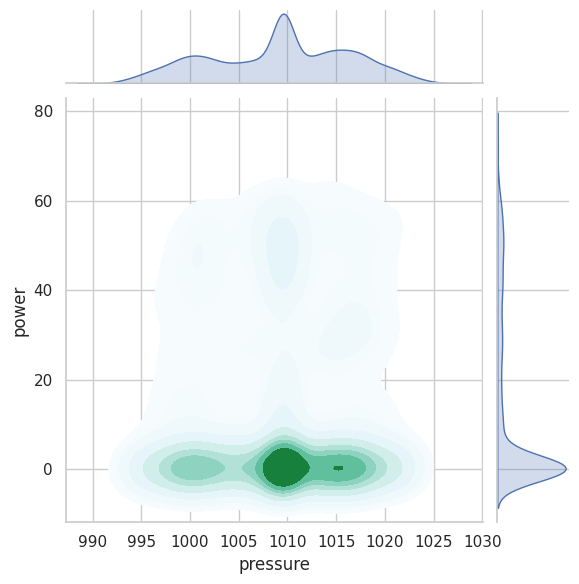

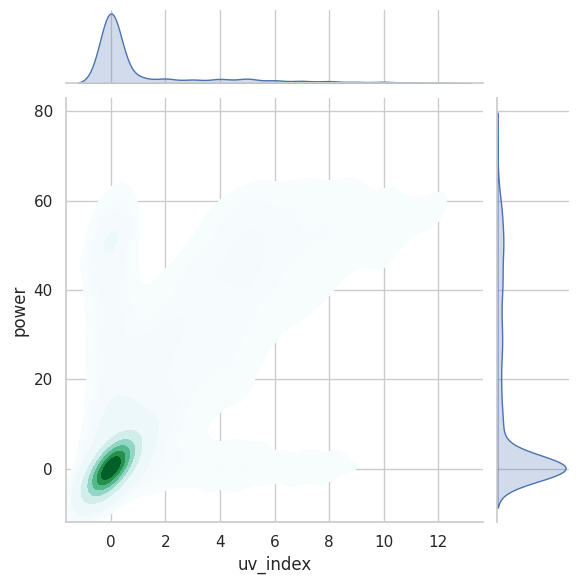

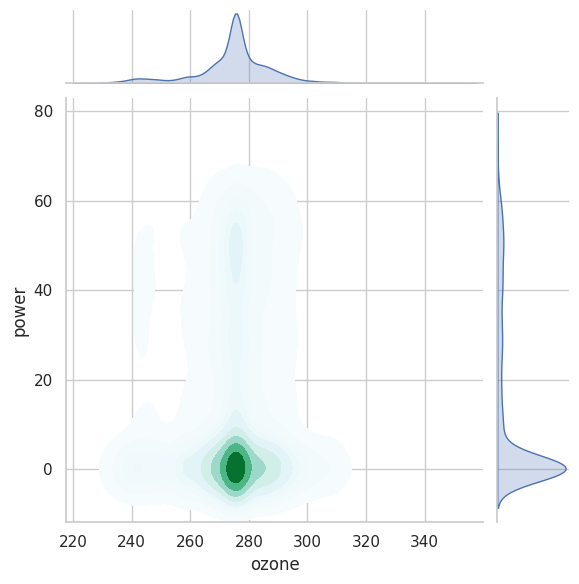

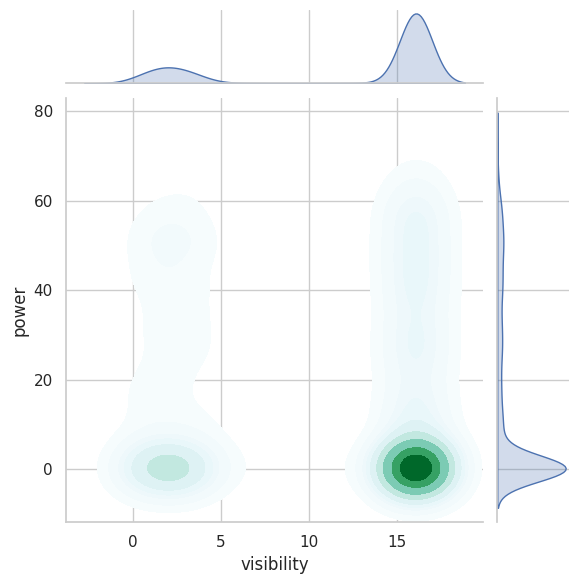

ValueError: Could not interpret value `log_power` for `x`. An entry with this name does not appear in `data`.

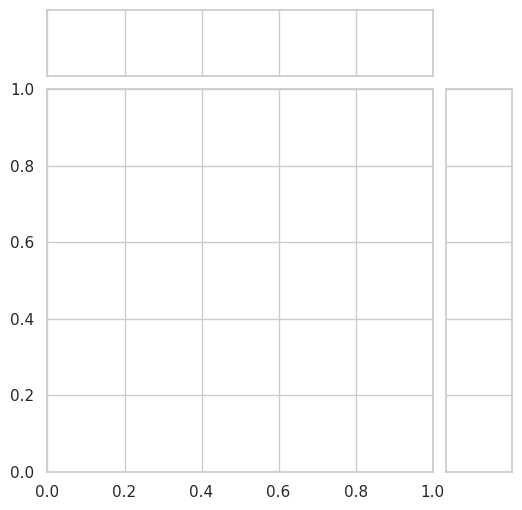

In [ ]:
def plot_density_2d(df, cols, col_y='power', kind='kde'):
    sns.set(style="whitegrid")
    for col in cols:
        g = sns.jointplot(data=df, x=col, y=col_y, kind=kind, cmap='BuGn', fill=True)
        g.set_axis_labels(col, col_y)
        plt.show()

plot_density_2d(df_weather_actual, num_cols)


### Correlation coefficients of all features

The correlation matrix shows some multicollinearity between variables, as well as many weak correlations.

In [ ]:
weather_act = df_weather_actual.drop(columns=['plant_id','wind_bearing','wind_speed','wind_gust','pressure','humidity','Unnamed: 0'])

<ipython-input-143-15805e63ff7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather_act.corr(), cmap='Greens', annot=True)


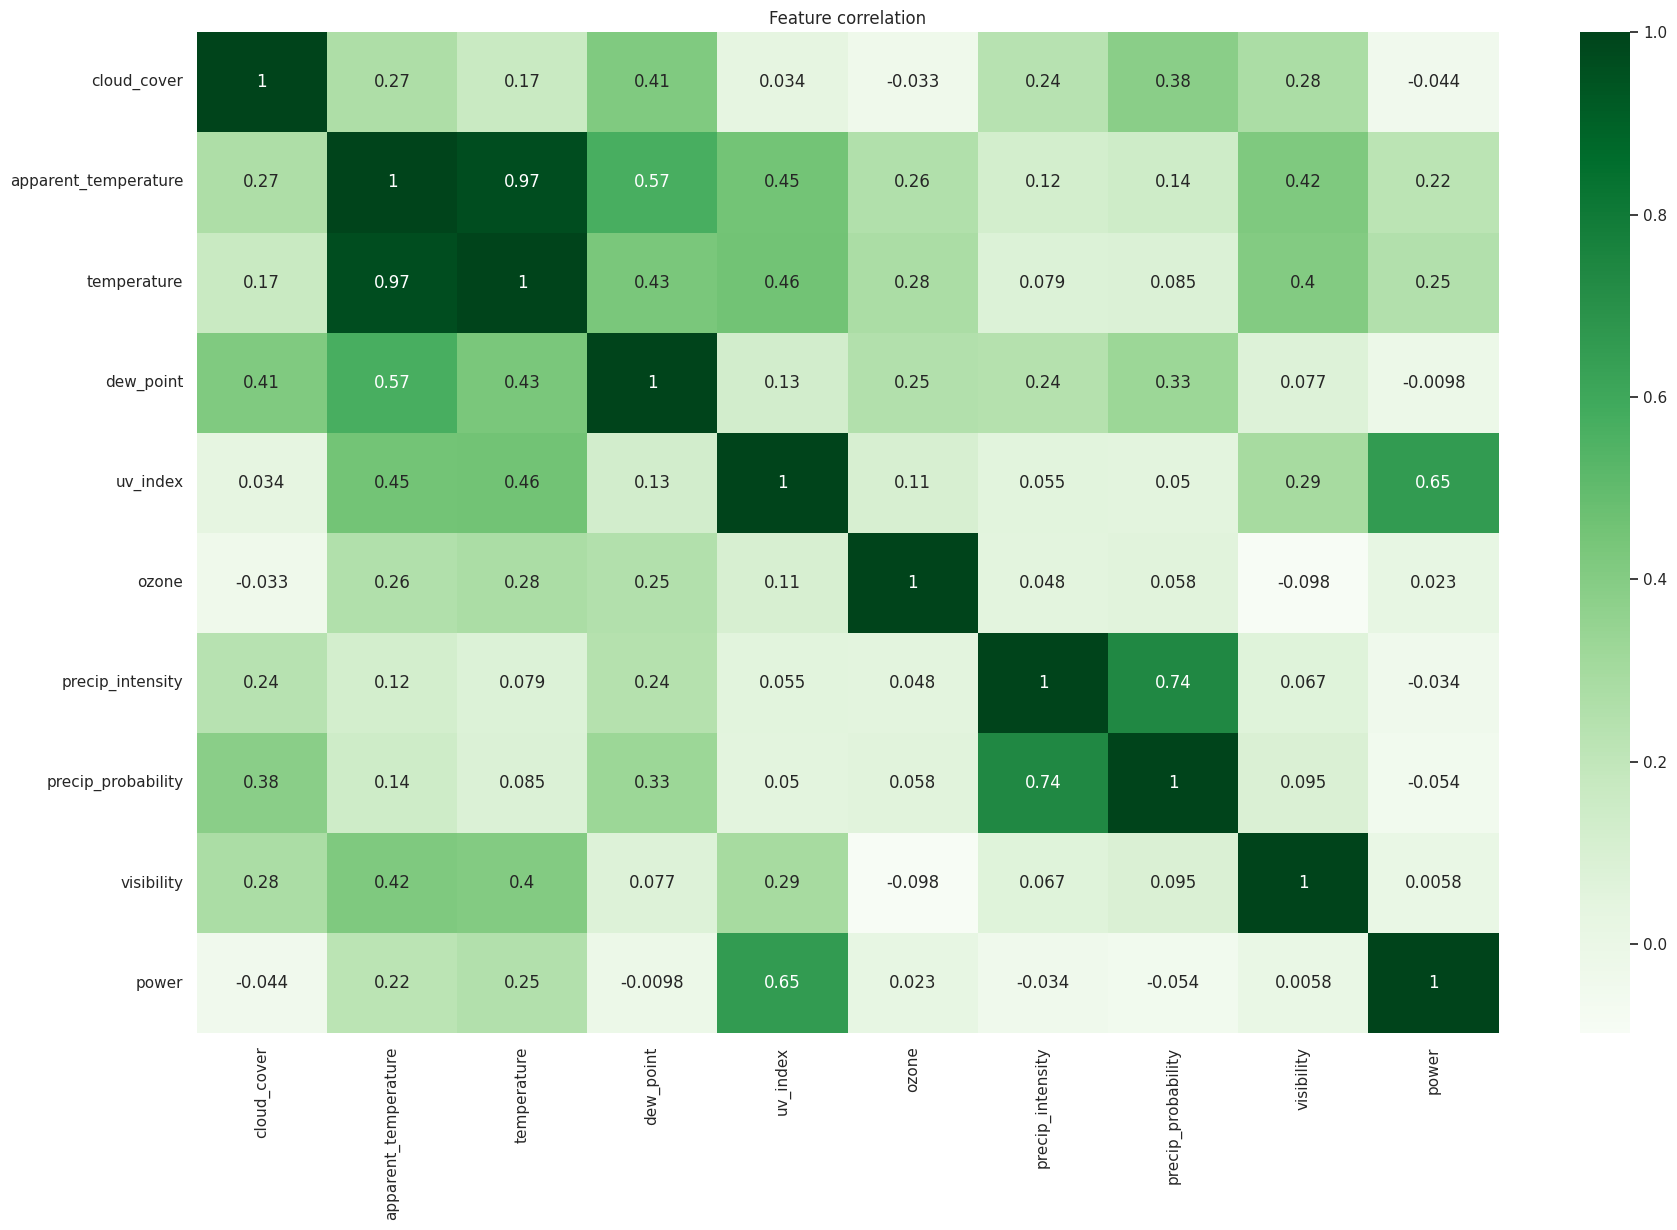

In [ ]:
plt.figure(figsize=(21, 13))
sns.heatmap(weather_act.corr(), cmap='Greens', annot=True)
plt.title('Feature correlation');

`uv_index` contributes more to power.     
`apprent_temperature` and `temperature` are similar, we can take any one of them while model building      
all other features contributes to power but less

## Applying Linear Regression

In [ ]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [ ]:
print(df_weather_actual['icon'].value_counts())
print(df_weather_actual['summary'].value_counts())
print(df_weather_actual['humidity'].value_counts())

clear-night            3075
clear-day              2997
fog                    2920
partly-cloudy-day      1768
partly-cloudy-night    1458
cloudy                 1305
rain                     94
wind                      2
Name: icon, dtype: int64
Clear                            5567
Foggy                            2918
Partly Cloudy                    1179
Humid and Mostly Cloudy           826
Humid and Overcast                714
Mostly Cloudy                     638
Overcast                          591
Humid and Partly Cloudy           583
Humid                             505
Possible Light Rain and Humid      52
Possible Light Rain                20
Rain and Humid                     13
Light Rain and Humid                4
Humid and Foggy                     2
Rain                                2
Breezy and Foggy                    2
Light Rain                          1
Possible Drizzle and Humid          1
Possible Drizzle                    1
Name: summary, dtype: int64
1

we are going to select only `icon` and `humidity` as categorical features, `summary` having larger categories with imbalance data would not able to perform while training model

In [ ]:
print(df_weather_actual['icon'].unique())
Features = df_weather_actual['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['clear-night' 'fog' 'clear-day' 'partly-cloudy-day' 'partly-cloudy-night'
 'wind' 'cloudy' 'rain']
[1 3 3 ... 5 5 5]


In [ ]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
print(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

[[1]
 [3]
 [3]
 ...
 [5]
 [5]
 [5]]


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()


categorical_columns = ['humidity']

for col in categorical_columns:
    temp = encode_string(df_weather_actual[col])
    Features = np.concatenate([Features, temp], axis = 1)
    #print(Features)

print(Features.shape)
print(Features[:2, :])

(13619, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [ ]:
Features = np.concatenate([Features, np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])], axis = 1)
Features[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.6520e+01, 1.9460e+01, 3.0800e+02, 3.7400e+00, 1.0079e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.8780e+01, 2.0060e+01, 1.7700e+02, 3.7400e+00, 1.0096e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.0600e+00]])

In [ ]:
# Features = np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])

## Split the dataset

In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual['power'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.25)
# print(indx)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Rescale Numeric features

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train[:,10:])
x_train[:,10:] = scaler.transform(x_train[:,10:])
x_test[:,10:] = scaler.transform(x_test[:,10:])
print(x_train.shape)
x_train[:10,:]

# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# x_train[:5,:]

(10214, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.15409846,  0.03586713, -0.91935444, -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.42906665],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.37280275,  1.53016334, -0.91935444, -0.0062695 , -1.15013152,
        -0.53378234, -0.45787869, -0.28499319,  0.60281425],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.94201072,  0.03586713,  0.7647048 , -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.79334808],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.857

In [ ]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

## Intially empty your model folder

In [ ]:
#from sklearn.externals import joblib

#filename = str(int(time.time())) + '_model_' + 'linear_mod.pkl'
# Save the model as a pickle in a file
#joblib.dump(lin_mod, './models/'+filename)

/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./models/1585025367_model_linear_mod.pkl']

In [ ]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 2.08132276e+13  2.08132276e+13  2.08132276e+13  2.08132276e+13
  2.08132276e+13  2.08132276e+13  2.08132276e+13  2.08132276e+13
 -2.08132276e+13 -2.08132276e+13  3.51745134e+00  1.10419121e+00
  9.81821562e-01  2.48075896e-01  5.36276220e+00  1.06953201e+01
 -4.15165226e-01 -1.85546875e-01 -3.13085938e+00]


In [ ]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)


    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

    return sklm.mean_squared_error(y_true, y_predicted), r2

y_score = lin_mod.predict(x_test)
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)

Mean Square Error      = 159.4247412215751
Root Mean Square Error = 12.626351065195957
Mean Absolute Error    = 8.558174036735297
Median Absolute Error  = 6.121170945759856
R^2                    = 0.5773548828347581
Adjusted R^2           = 0.5739757243617165


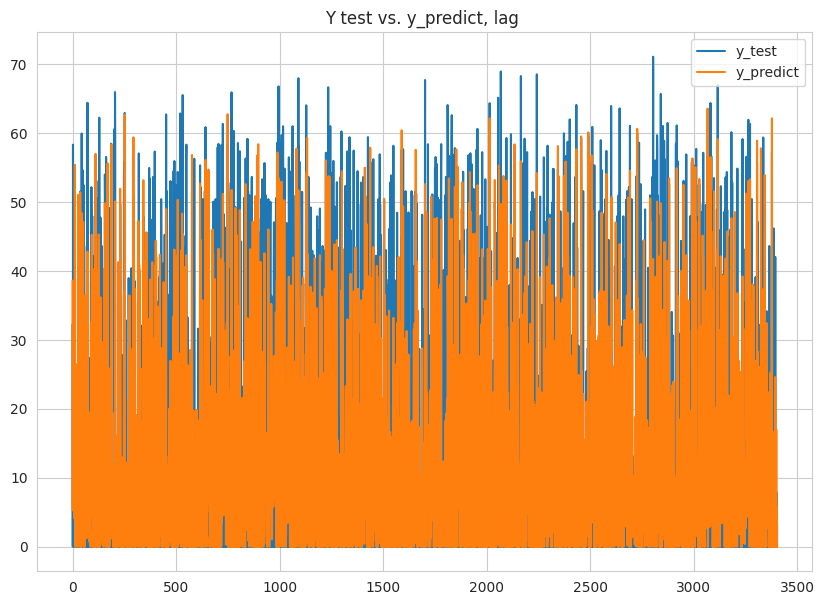

In [ ]:
def plot_res(y_test, y_score, label_test, label_score, dpi=100):
    plt.figure(figsize=(10,7), dpi=dpi)
    plt.plot(y_test, label=label_test)
    plt.plot(y_score, label=label_score)
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag ' )
    plt.show()

plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')

In [ ]:
model_results = []

In [ ]:
# Save all the results

model_results_dict = {}

model_results_dict['Algo'] = 'Linear Regression'
model_results_dict['lag'] = 'NA'
model_results_dict['dropout'] = 'NA'
model_results_dict['epochs'] = 'NA'
model_results_dict['batch_size'] = 'NA'
model_results_dict['loss'] = 'NA'
model_results_dict['rmse'] = rmse
model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
model_results_dict['r2'] = r2
model_results_dict['model_filename'] = filename
model_results_dict['time_ran'] = int(time.time())
model_results.append(model_results_dict)

## Applying LSTM

In [ ]:
x_train.shape

(10214, 19)

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

1. Samples. One sequence is one sample. A batch is comprised of one or more samples.
2. Time Steps. One time step is one point of observation in the sample.
3. Features. One feature is one observation at a time step.

In [ ]:
X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
X_train.shape

(10214, 1, 19)

Epoch 1/35
852/852 [==============================] - 5s 4ms/step - loss: 395.9730 - val_loss: 272.0210
Epoch 2/35
852/852 [==============================] - 3s 3ms/step - loss: 235.5850 - val_loss: 191.3423
Epoch 3/35
852/852 [==============================] - 4s 4ms/step - loss: 185.5731 - val_loss: 159.3427
Epoch 4/35
852/852 [==============================] - 3s 4ms/step - loss: 169.7021 - val_loss: 148.3103
Epoch 5/35
852/852 [==============================] - 3s 3ms/step - loss: 161.9955 - val_loss: 143.6971
Epoch 6/35
852/852 [==============================] - 3s 3ms/step - loss: 160.8049 - val_loss: 140.9707
Epoch 7/35
852/852 [==============================] - 3s 4ms/step - loss: 157.0896 - val_loss: 138.7658
Epoch 8/35
852/852 [==============================] - 4s 4ms/step - loss: 156.1745 - val_loss: 136.8701
Epoch 9/35
852/852 [==============================] - 3s 3ms/step - loss: 155.1387 - val_loss: 135.8148
Epoch 10/35
852/852 [==============================] - 3s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


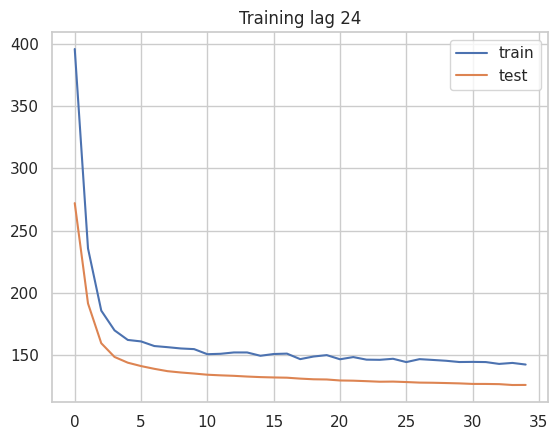

107/107 [==============================] - 1s 2ms/step
Mean Square Error      = [134.51802]
Root Mean Square Error = 11.598190403243207
Mean Absolute Error    = [6.9767923]
Median Absolute Error  = [2.528862]
R^2                    = 0.6433841266262644
Adjusted R^2           = 0.6405328892614167


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

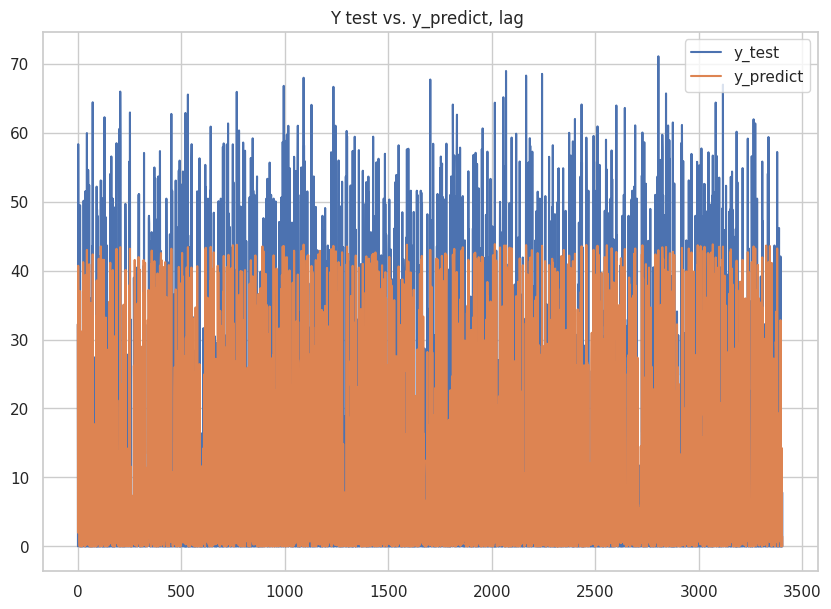

In [ ]:
def LSTM_model(X_train, y_train, X_test, y_test,batch_size_= 12, dropout_=.3,epochs_=35, samples=24):


    # comment out this box and uncomment load_model to load saved model


    # design network
    model = Sequential()
    model.add(LSTM(int(samples), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs_,
                        batch_size=batch_size_,
                        validation_data=(X_test, y_test),
                        verbose=1,
                        shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)



    # uncomment to load
    model = load_model('/content/models/1705663943_model_24_lag.h5')

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.show()

    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    (rmse, r2) = print_metrics(y_test, y_score, 28)
    plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')

    # Save all the results

    model_results_dict = {}

    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = rmse
    model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
    model_results_dict['r2'] = r2
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)


LSTM_model(X_train,y_train, X_test,y_test)

Epoch 1/40
852/852 [==============================] - 13s 8ms/step - loss: 326.8385 - val_loss: 231.5533
Epoch 2/40
852/852 [==============================] - 5s 6ms/step - loss: 201.5978 - val_loss: 173.1979
Epoch 3/40
852/852 [==============================] - 6s 6ms/step - loss: 168.9749 - val_loss: 153.5338
Epoch 4/40
852/852 [==============================] - 5s 5ms/step - loss: 156.6506 - val_loss: 144.3797
Epoch 5/40
852/852 [==============================] - 6s 7ms/step - loss: 150.3676 - val_loss: 138.8773
Epoch 6/40
852/852 [==============================] - 5s 6ms/step - loss: 146.2222 - val_loss: 135.4422
Epoch 7/40
852/852 [==============================] - 5s 5ms/step - loss: 143.0592 - val_loss: 133.0719
Epoch 8/40
852/852 [==============================] - 6s 7ms/step - loss: 140.4861 - val_loss: 131.2021
Epoch 9/40
852/852 [==============================] - 5s 5ms/step - loss: 138.2974 - val_loss: 129.5964
Epoch 10/40
852/852 [==============================] - 5s 6ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


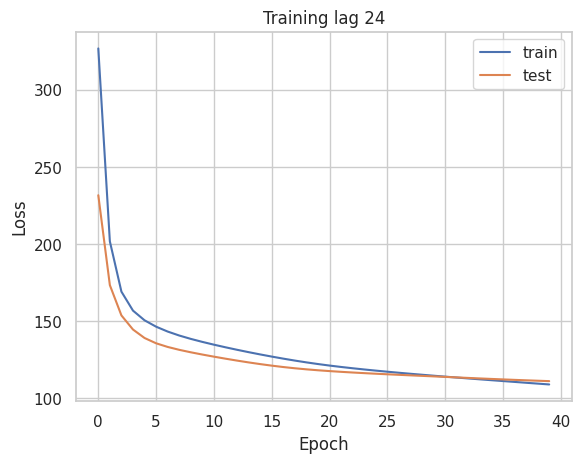

107/107 [==============================] - 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

Mean Squared Error (MSE): 110.87
Root Mean Square Error (RMSE): 10.53
Mean Absolute Error (MAE): 5.76
Median Absolute Error (MedAE): 1.58
R-squared (R^2): 0.71
Adjusted R-squared (Adjusted R^2): 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error  # Add these imports

def calculate_adjusted_r2(r2, n, p):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def print_metrics(y_true, y_pred, num_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = calculate_adjusted_r2(r2, len(y_true), num_features + 1)

    print(f"Mean Squared Error (MSE): {float(mse):.2f}")
    print(f"Root Mean Square Error (RMSE): {float(rmse):.2f}")
    print(f"Mean Absolute Error (MAE): {float(mae):.2f}")
    print(f"Median Absolute Error (MedAE): {float(medae):.2f}")
    print(f"R-squared (R^2): {float(r2):.2f}")
    print(f"Adjusted R-squared (Adjusted R^2): {float(adjusted_r2):.2f}")

def LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=40, samples=24):
    # design network
    model = Sequential()
    model.add(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(samples, return_sequences=True))
    model.add(LSTM(samples))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # uncomment to load
    model = load_model('./models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    print_metrics(y_test, y_score, X_train.shape[2])

    # Save all the results
    model_results_dict = {}
    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = np.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['power_gen_rmse'] = math.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['r2'] = r2_score(y_test, y_score)
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test)


Epoch 1/40
852/852 [==============================] - 12s 7ms/step - loss: 323.7089 - val_loss: 231.6660
Epoch 2/40
852/852 [==============================] - 6s 7ms/step - loss: 201.6572 - val_loss: 172.5400
Epoch 3/40
852/852 [==============================] - 5s 6ms/step - loss: 168.2884 - val_loss: 153.5199
Epoch 4/40
852/852 [==============================] - 5s 5ms/step - loss: 156.3111 - val_loss: 144.5538
Epoch 5/40
852/852 [==============================] - 6s 7ms/step - loss: 149.7926 - val_loss: 138.8217
Epoch 6/40
852/852 [==============================] - 5s 6ms/step - loss: 145.1518 - val_loss: 135.1100
Epoch 7/40
852/852 [==============================] - 6s 7ms/step - loss: 141.6216 - val_loss: 132.5183
Epoch 8/40
852/852 [==============================] - 5s 6ms/step - loss: 138.7937 - val_loss: 130.4406
Epoch 9/40
852/852 [==============================] - 5s 6ms/step - loss: 136.4430 - val_loss: 128.6915
Epoch 10/40
852/852 [==============================] - 6s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


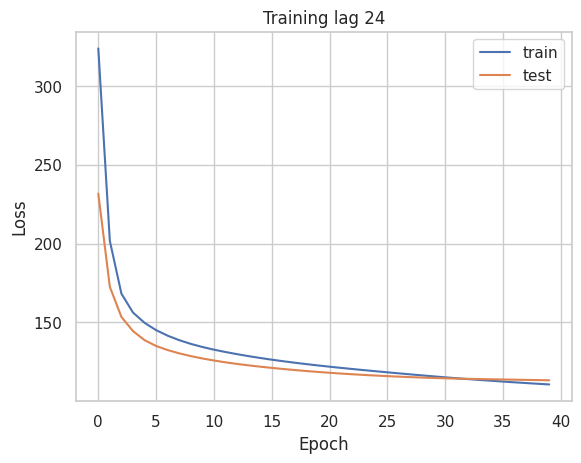

107/107 [==============================] - 2s 2ms/step
Mean Squared Error (MSE): 113.36
Root Mean Square Error (RMSE): 10.65
Mean Absolute Error (MAE): 5.83
Median Absolute Error (MedAE): 1.51
R-squared (R^2): 0.70
Adjusted R-squared (Adjusted R^2): 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: name 'mse' is not defined

In [ ]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Define the global variable for storing model results
model_results = []

def calculate_adjusted_r2(r2, n, p):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def print_metrics(y_true, y_pred, num_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = calculate_adjusted_r2(r2, len(y_true), num_features + 1)

    print(f"Mean Squared Error (MSE): {float(mse):.2f}")
    print(f"Root Mean Square Error (RMSE): {float(rmse):.2f}")
    print(f"Mean Absolute Error (MAE): {float(mae):.2f}")
    print(f"Median Absolute Error (MedAE): {float(medae):.2f}")
    print(f"R-squared (R^2): {float(r2):.2f}")
    print(f"Adjusted R-squared (Adjusted R^2): {float(adjusted_r2):.2f}")

def LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=40, samples=24):
    # design network
    model = Sequential()
    model.add(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(samples, return_sequences=True))
    model.add(LSTM(samples))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # uncomment to load
    model = load_model('./models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    print_metrics(y_test, y_score, X_train.shape[2])

    # Save all the results
    model_results_dict = {}
    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = np.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['power_gen_rmse'] = math.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['r2'] = r2_score(y_test, y_score)
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)

    return mse, rmse, mae, medae, r2, adjusted_r2

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test)


## Test LSTM model for different parameters

Epoch 1/10
852/852 [==============================] - 112s 123ms/step - loss: 174.7743 - val_loss: 138.9475
Epoch 2/10
852/852 [==============================] - 106s 124ms/step - loss: 152.7784 - val_loss: 134.8421
Epoch 3/10
852/852 [==============================] - 106s 124ms/step - loss: 147.9956 - val_loss: 132.1752
Epoch 4/10
852/852 [==============================] - 106s 124ms/step - loss: 145.2331 - val_loss: 131.1749
Epoch 5/10
852/852 [==============================] - 108s 127ms/step - loss: 143.1974 - val_loss: 130.9196
Epoch 6/10
852/852 [==============================] - 105s 124ms/step - loss: 141.2206 - val_loss: 129.9759
Epoch 7/10
852/852 [==============================] - 106s 125ms/step - loss: 138.9577 - val_loss: 128.0280
Epoch 8/10
852/852 [==============================] - 105s 123ms/step - loss: 136.3925 - val_loss: 126.3002
Epoch 9/10
852/852 [==============================] - 106s 124ms/step - loss: 133.9297 - val_loss: 125.0789
Epoch 10/10
852/852 [=======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


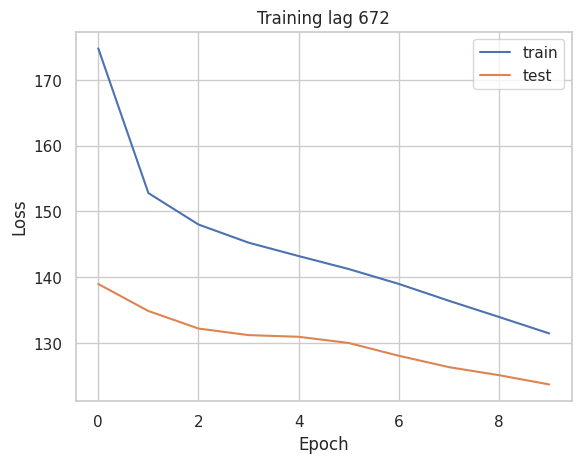

107/107 [==============================] - 4s 23ms/step
Mean Squared Error (MSE): 123.67
Root Mean Square Error (RMSE): 11.12
Mean Absolute Error (MAE): 6.22
Median Absolute Error (MedAE): 2.01
R-squared (R^2): 0.67
Adjusted R-squared (Adjusted R^2): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: name 'mse' is not defined

In [ ]:
batch_size_ = 12
dropout_ =0.33
epochs_ = 10
samples = 672

LSTM_model(X_train,y_train, X_test,y_test, batch_size_, dropout_, epochs_, samples)

Epoch 1/20
852/852 [==============================] - 17s 7ms/step - loss: 259.8027 - val_loss: 170.2474
Epoch 2/20
852/852 [==============================] - 6s 7ms/step - loss: 163.5870 - val_loss: 146.2597
Epoch 3/20
852/852 [==============================] - 5s 6ms/step - loss: 152.4366 - val_loss: 138.7032
Epoch 4/20
852/852 [==============================] - 6s 7ms/step - loss: 147.5309 - val_loss: 135.2552
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 144.4019 - val_loss: 133.1008
Epoch 6/20
852/852 [==============================] - 6s 8ms/step - loss: 142.0407 - val_loss: 131.4335
Epoch 7/20
852/852 [==============================] - 5s 6ms/step - loss: 140.0186 - val_loss: 129.9996
Epoch 8/20
852/852 [==============================] - 5s 6ms/step - loss: 138.1401 - val_loss: 128.7240
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 136.3245 - val_loss: 127.5869
Epoch 10/20
852/852 [==============================] - 6s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


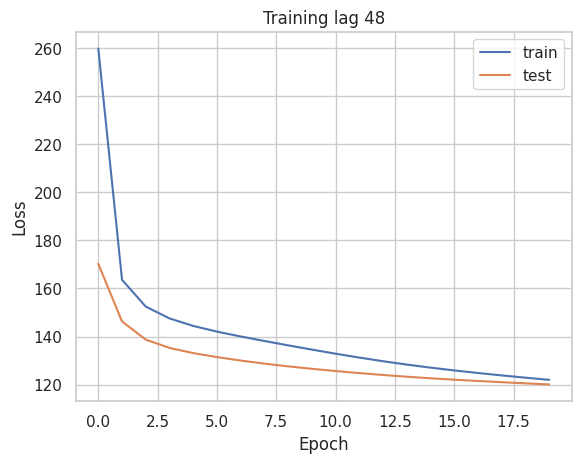

107/107 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 120.06
Root Mean Square Error (RMSE): 10.96
Mean Absolute Error (MAE): 5.96
Median Absolute Error (MedAE): 1.53
R-squared (R^2): 0.68
Adjusted R-squared (Adjusted R^2): 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: name 'mse' is not defined

In [ ]:
# Assuming you have X_train, y_train, X_test, and y_test from your previous code

batch_size_ = 12
dropout_ = 0.3
epochs_ = 20
samples = 48

# Run the LSTM model with the specified parameters
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)


Epoch 1/20
852/852 [==============================] - 15s 9ms/step - loss: 213.8145 - val_loss: 147.3646
Epoch 2/20
852/852 [==============================] - 7s 8ms/step - loss: 154.3547 - val_loss: 138.1021
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 148.8624 - val_loss: 134.7342
Epoch 4/20
852/852 [==============================] - 7s 8ms/step - loss: 145.6295 - val_loss: 132.6790
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 143.2069 - val_loss: 131.0239
Epoch 6/20
852/852 [==============================] - 6s 8ms/step - loss: 141.0983 - val_loss: 129.6916
Epoch 7/20
852/852 [==============================] - 6s 7ms/step - loss: 139.1784 - val_loss: 128.6204
Epoch 8/20
852/852 [==============================] - 6s 7ms/step - loss: 137.3601 - val_loss: 127.6737
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 135.5802 - val_loss: 126.7539
Epoch 10/20
852/852 [==============================] - 6s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


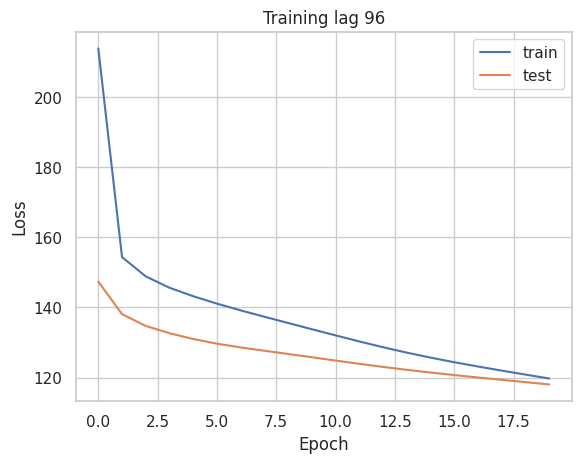

107/107 [==============================] - 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

Mean Squared Error (MSE): 118.05
Root Mean Square Error (RMSE): 10.87
Mean Absolute Error (MAE): 5.99
Median Absolute Error (MedAE): 1.74
R-squared (R^2): 0.69
Adjusted R-squared (Adjusted R^2): 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)


NameError: name 'mse' is not defined

In [ ]:
# Assuming you have X_train, y_train, X_test, and y_test from your previous code

batch_size_ = 12
dropout_ = 0.3
epochs_ = 20
samples = 96

# Run the LSTM model with the specified parameters
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)


Epoch 1/20
852/852 [==============================] - 14s 9ms/step - loss: 213.9933 - val_loss: 147.7869
Epoch 2/20
852/852 [==============================] - 7s 8ms/step - loss: 154.7058 - val_loss: 138.5285
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 149.3527 - val_loss: 134.9991
Epoch 4/20
852/852 [==============================] - 7s 8ms/step - loss: 146.1114 - val_loss: 132.8745
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 143.7089 - val_loss: 131.1413
Epoch 6/20
852/852 [==============================] - 7s 8ms/step - loss: 141.6437 - val_loss: 129.6478
Epoch 7/20
852/852 [==============================] - 6s 7ms/step - loss: 139.7776 - val_loss: 128.4307
Epoch 8/20
852/852 [==============================] - 7s 8ms/step - loss: 138.0689 - val_loss: 127.3817
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 136.4531 - val_loss: 126.4081
Epoch 10/20
852/852 [==============================] - 7s 8ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


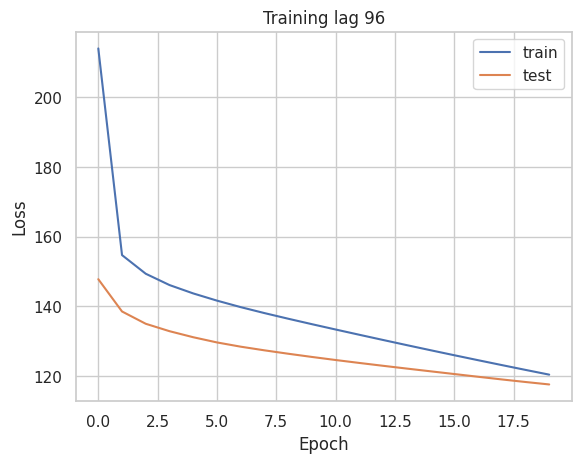

107/107 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 117.57
Root Mean Square Error (RMSE): 10.84
Mean Absolute Error (MAE): 5.98
Median Absolute Error (MedAE): 1.72
R-squared (R^2): 0.69
Adjusted R-squared (Adjusted R^2): 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: name 'mse' is not defined

In [ ]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Define the global variable for storing model results
model_results = []

def calculate_adjusted_r2(r2, n, p):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

def print_metrics(y_true, y_pred, num_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = calculate_adjusted_r2(r2, len(y_true), num_features + 1)

    print(f"Mean Squared Error (MSE): {float(mse):.2f}")
    print(f"Root Mean Square Error (RMSE): {float(rmse):.2f}")
    print(f"Mean Absolute Error (MAE): {float(mae):.2f}")
    print(f"Median Absolute Error (MedAE): {float(medae):.2f}")
    print(f"R-squared (R^2): {float(r2):.2f}")
    print(f"Adjusted R-squared (Adjusted R^2): {float(adjusted_r2):.2f}")

def LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=40, samples=24):
    # design network
    model = Sequential()
    model.add(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(LSTM(samples, return_sequences=True))
    model.add(LSTM(samples))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # uncomment to load
    model = load_model('./models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]
    print_metrics(y_test, y_score, X_train.shape[2])

    # Save all the results
    model_results_dict = {}
    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = np.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['power_gen_rmse'] = math.sqrt(mean_squared_error(y_test, y_score))
    model_results_dict['r2'] = r2_score(y_test, y_score)
    model_results_dict['adjusted_r2'] = calculate_adjusted_r2(model_results_dict['r2'], len(y_test), X_train.shape[2] + 1)
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)

    return mse, rmse, mae, medae, r2, model_results_dict['adjusted_r2']

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
batch_size_ = 12
dropout_ = 0.3
epochs_ = 20
samples = 96

# Run the LSTM model with the specified parameters
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)

# Print various error metrics
#print("Mean Squared Error (MSE):


Epoch 1/10
852/852 [==============================] - 30s 24ms/step - loss: 185.6131 - val_loss: 141.1522
Epoch 2/10
852/852 [==============================] - 19s 23ms/step - loss: 152.7993 - val_loss: 135.7016
Epoch 3/10
852/852 [==============================] - 18s 21ms/step - loss: 147.9818 - val_loss: 133.0851
Epoch 4/10
852/852 [==============================] - 18s 21ms/step - loss: 145.0585 - val_loss: 131.2691
Epoch 5/10
852/852 [==============================] - 18s 22ms/step - loss: 142.8151 - val_loss: 129.9428
Epoch 6/10
852/852 [==============================] - 18s 21ms/step - loss: 140.9209 - val_loss: 128.8811
Epoch 7/10
852/852 [==============================] - 19s 22ms/step - loss: 139.2138 - val_loss: 127.9277
Epoch 8/10
852/852 [==============================] - 18s 21ms/step - loss: 137.5564 - val_loss: 127.0508
Epoch 9/10
852/852 [==============================] - 18s 21ms/step - loss: 135.8411 - val_loss: 126.2587
Epoch 10/10
852/852 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


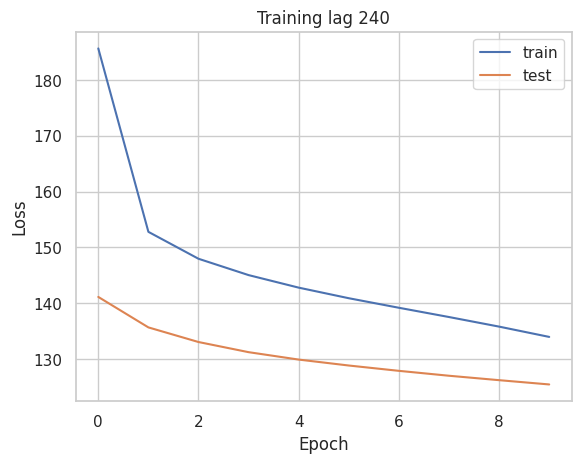

107/107 [==============================] - 2s 6ms/step
Mean Squared Error (MSE): 125.48
Root Mean Square Error (RMSE): 11.20
Mean Absolute Error (MAE): 6.23
Median Absolute Error (MedAE): 1.91
R-squared (R^2): 0.67
Adjusted R-squared (Adjusted R^2): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

NameError: name 'mse' is not defined

In [ ]:
# Assuming you have X_train, y_train, X_test, and y_test from your previous code

batch_size_ = 12
dropout_ = 0.3
epochs_ = 10
samples = 240

# Run the LSTM model with the specified parameters
mse, rmse, mae, medae, r2, adjusted_r2 = LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)


Epoch 1/20
852/852 [==============================] - 18s 8ms/step - loss: 263.4309 - val_loss: 170.7454
Epoch 2/20
852/852 [==============================] - 5s 6ms/step - loss: 163.9418 - val_loss: 145.6943
Epoch 3/20
852/852 [==============================] - 5s 6ms/step - loss: 152.0380 - val_loss: 137.4412
Epoch 4/20
852/852 [==============================] - 5s 6ms/step - loss: 146.6586 - val_loss: 133.4333
Epoch 5/20
852/852 [==============================] - 6s 6ms/step - loss: 143.0454 - val_loss: 130.8071
Epoch 6/20
852/852 [==============================] - 5s 6ms/step - loss: 140.2376 - val_loss: 128.7244
Epoch 7/20
852/852 [==============================] - 6s 7ms/step - loss: 137.8052 - val_loss: 127.0225
Epoch 8/20
852/852 [==============================] - 5s 6ms/step - loss: 135.5669 - val_loss: 125.6507
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 133.4594 - val_loss: 124.5176
Epoch 10/20
852/852 [==============================] - 5s 6ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


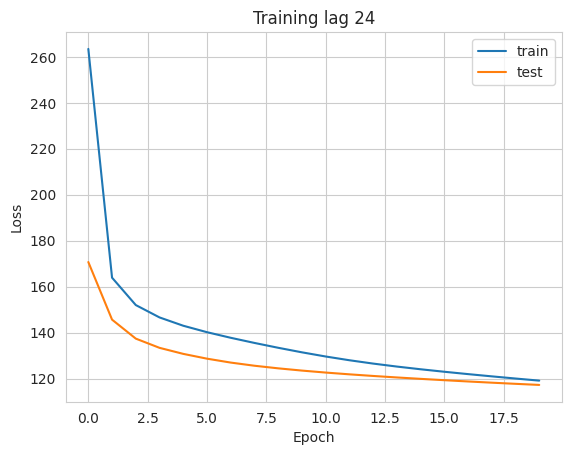

107/107 [==============================] - 2s 2ms/step
Mean Square Error      = [117.30077]
Root Mean Square Error = 10.830548168057122
Mean Absolute Error    = [5.8770666]
Median Absolute Error  = [1.4857695]
R^2                    = 0.6890276071433097
Adjusted R^2           = 0.6873744756987082


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

def Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=20, samples=24):
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
    model.add(Bidirectional(LSTM(samples, return_sequences=True)))
    model.add(Bidirectional(LSTM(samples)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_bidirectional_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)
    model = load_model('./models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]

    mse = mean_squared_error(y_test, y_score)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_score)
    medae = median_absolute_error(y_test, y_score)
    r2 = r2_score(y_test, y_score)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print_metrics(y_test, y_score, X_train.shape[2])

    return mse, rmse, mae, medae, r2, adjusted_r2

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test)


Epoch 1/20
852/852 [==============================] - 16s 9ms/step - loss: 213.8691 - val_loss: 147.5113
Epoch 2/20
852/852 [==============================] - 5s 6ms/step - loss: 153.8352 - val_loss: 137.9462
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 148.0995 - val_loss: 134.1443
Epoch 4/20
852/852 [==============================] - 5s 6ms/step - loss: 144.4348 - val_loss: 131.5524
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 141.5157 - val_loss: 129.5319
Epoch 6/20
852/852 [==============================] - 5s 6ms/step - loss: 139.0277 - val_loss: 128.0517
Epoch 7/20
852/852 [==============================] - 6s 6ms/step - loss: 136.8355 - val_loss: 126.9419
Epoch 8/20
852/852 [==============================] - 5s 6ms/step - loss: 134.8135 - val_loss: 126.0042
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 132.8842 - val_loss: 125.1341
Epoch 10/20
852/852 [==============================] - 5s 6ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


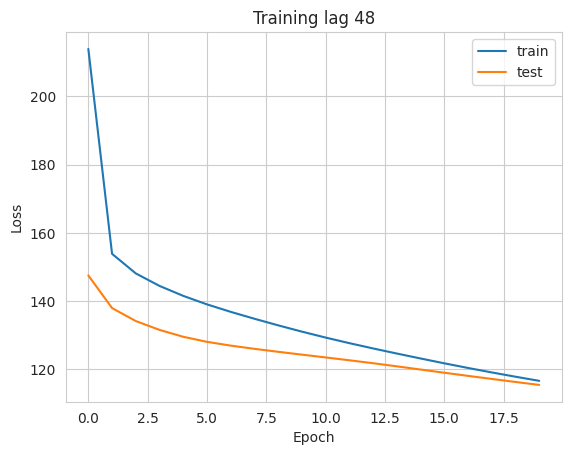

107/107 [==============================] - 2s 2ms/step
Mean Square Error      = [115.414566]
Root Mean Square Error = 10.743117147273368
Mean Absolute Error    = [5.8955903]
Median Absolute Error  = [1.6857517]
R^2                    = 0.6940277269842614
Adjusted R^2           = 0.6924011762121753

Metrics for Bi-LSTM model with 48 samples:
MSE: [115.414566]
RMSE: [10.743117]
MAE: [5.8955903]
MedAE: [1.6857517]
R^2: 0.6940277269842614
Adjusted R^2: 0.6939378144738249


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
batch_size_ = 12
dropout_ = 0.3
epochs_ = 20
samples = 48

# Run the Bi-LSTM model
mse_48, rmse_48, mae_48, medae_48, r2_48, adjusted_r2_48 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)

# Print metrics for samples = 48
print("\nMetrics for Bi-LSTM model with 48 samples:")
print(f"MSE: {mse_48}")
print(f"RMSE: {rmse_48}")
print(f"MAE: {mae_48}")
print(f"MedAE: {medae_48}")
print(f"R^2: {r2_48}")
print(f"Adjusted R^2: {adjusted_r2_48}")


Epoch 1/20
852/852 [==============================] - 20s 9ms/step - loss: 212.2915 - val_loss: 146.8999
Epoch 2/20
852/852 [==============================] - 6s 7ms/step - loss: 153.3816 - val_loss: 137.3526
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 147.5898 - val_loss: 133.5091
Epoch 4/20
852/852 [==============================] - 6s 8ms/step - loss: 143.9982 - val_loss: 131.0065
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 141.3138 - val_loss: 129.0843
Epoch 6/20
852/852 [==============================] - 6s 7ms/step - loss: 139.0599 - val_loss: 127.5789
Epoch 7/20
852/852 [==============================] - 6s 7ms/step - loss: 137.0239 - val_loss: 126.3152
Epoch 8/20
852/852 [==============================] - 6s 7ms/step - loss: 135.0766 - val_loss: 125.1713
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 133.1617 - val_loss: 124.1041
Epoch 10/20
852/852 [==============================] - 6s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


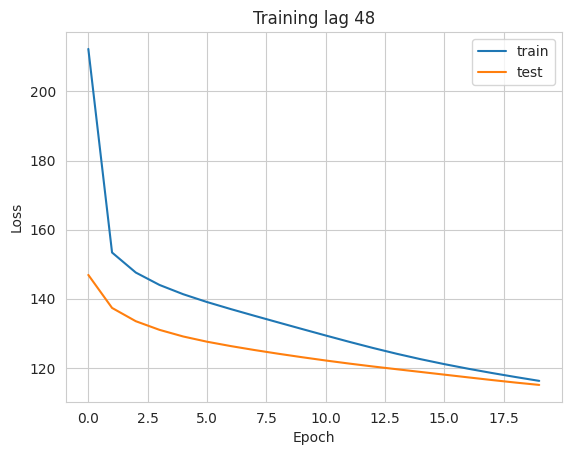

107/107 [==============================] - 2s 2ms/step
Mean Square Error      = [115.05737]
Root Mean Square Error = 10.72647999330978
Mean Absolute Error    = [5.9015403]
Median Absolute Error  = [1.6900864]
R^2                    = 0.6949752429555944
Adjusted R^2           = 0.693353729185128


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
batch_size_ = 12
dropout_ = 0.2
epochs_ = 20
samples = 48

# Run the Bi-LSTM model
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)




Epoch 1/20
852/852 [==============================] - 21s 12ms/step - loss: 188.6192 - val_loss: 140.9329
Epoch 2/20
852/852 [==============================] - 9s 10ms/step - loss: 151.9142 - val_loss: 135.1437
Epoch 3/20
852/852 [==============================] - 9s 10ms/step - loss: 147.1850 - val_loss: 132.3417
Epoch 4/20
852/852 [==============================] - 9s 10ms/step - loss: 144.1949 - val_loss: 130.4057
Epoch 5/20
852/852 [==============================] - 8s 10ms/step - loss: 141.8964 - val_loss: 128.9368
Epoch 6/20
852/852 [==============================] - 8s 9ms/step - loss: 139.9229 - val_loss: 127.7292
Epoch 7/20
852/852 [==============================] - 8s 10ms/step - loss: 138.1182 - val_loss: 126.6727
Epoch 8/20
852/852 [==============================] - 8s 10ms/step - loss: 136.3654 - val_loss: 125.7248
Epoch 9/20
852/852 [==============================] - 9s 10ms/step - loss: 134.5714 - val_loss: 124.8744
Epoch 10/20
852/852 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


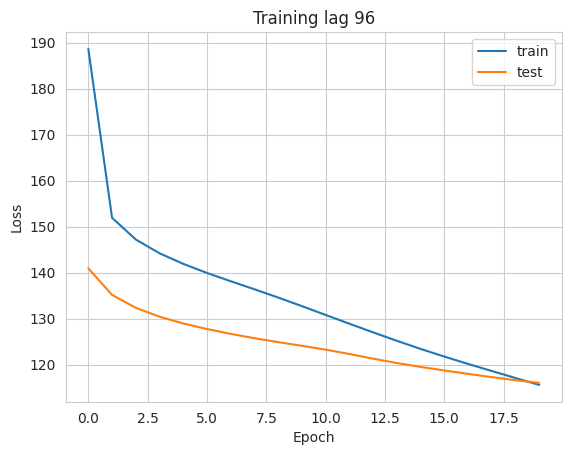

107/107 [==============================] - 2s 4ms/step
Mean Square Error      = [116.014206]
Root Mean Square Error = 10.770989087944393
Mean Absolute Error    = [5.918817]
Median Absolute Error  = [1.9231265]
R^2                    = 0.6924382866716192
Adjusted R^2           = 0.6908032864235653


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
batch_size_ = 12
dropout_ = 0.2
epochs_ = 20
samples = 96

# Run the Bi-LSTM model
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)




Epoch 1/10
852/852 [==============================] - 39s 28ms/step - loss: 175.4454 - val_loss: 138.0567
Epoch 2/10
852/852 [==============================] - 21s 25ms/step - loss: 151.3316 - val_loss: 133.9775
Epoch 3/10
852/852 [==============================] - 21s 25ms/step - loss: 146.8351 - val_loss: 131.4461
Epoch 4/10
852/852 [==============================] - 21s 25ms/step - loss: 144.0245 - val_loss: 130.1093
Epoch 5/10
852/852 [==============================] - 22s 26ms/step - loss: 141.9281 - val_loss: 129.3299
Epoch 6/10
852/852 [==============================] - 24s 29ms/step - loss: 140.0256 - val_loss: 128.9924
Epoch 7/10
852/852 [==============================] - 22s 26ms/step - loss: 138.0500 - val_loss: 128.4568
Epoch 8/10
852/852 [==============================] - 22s 26ms/step - loss: 135.7962 - val_loss: 126.9388
Epoch 9/10
852/852 [==============================] - 24s 28ms/step - loss: 133.1847 - val_loss: 125.0995
Epoch 10/10
852/852 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


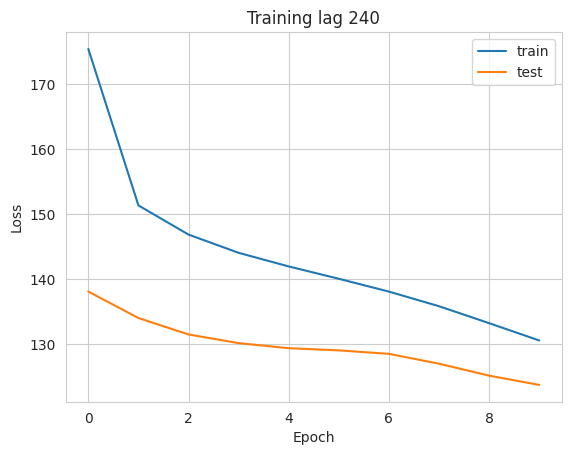

107/107 [==============================] - 2s 8ms/step
Mean Square Error      = [123.66879]
Root Mean Square Error = 11.12064713605325
Mean Absolute Error    = [6.155578]
Median Absolute Error  = [1.7727352]
R^2                    = 0.6721458597656069
Adjusted R^2           = 0.6704029848322877


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
batch_size_ = 12
dropout_ = 0.2
epochs_ = 10
samples = 240

# Run the Bi-LSTM model
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)




Epoch 1/10
852/852 [==============================] - 194s 215ms/step - loss: 172.3699 - val_loss: 138.1553
Epoch 2/10
852/852 [==============================] - 168s 198ms/step - loss: 153.2319 - val_loss: 133.6664
Epoch 3/10
852/852 [==============================] - 164s 193ms/step - loss: 148.7038 - val_loss: 132.3304
Epoch 4/10
852/852 [==============================] - 167s 196ms/step - loss: 145.6376 - val_loss: 130.9750
Epoch 5/10
852/852 [==============================] - 164s 192ms/step - loss: 142.7229 - val_loss: 128.5409
Epoch 6/10
852/852 [==============================] - 161s 189ms/step - loss: 140.2376 - val_loss: 126.4988
Epoch 7/10
852/852 [==============================] - 163s 191ms/step - loss: 136.8321 - val_loss: 126.3608
Epoch 8/10
852/852 [==============================] - 161s 189ms/step - loss: 134.1323 - val_loss: 124.9572
Epoch 9/10
852/852 [==============================] - 160s 188ms/step - loss: 131.0160 - val_loss: 123.0674
Epoch 10/10
852/852 [=======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


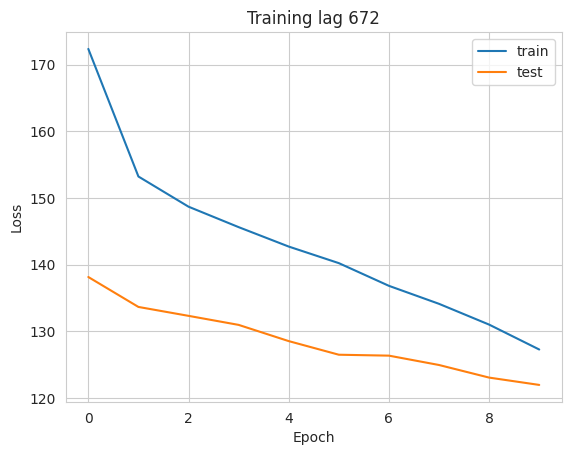

107/107 [==============================] - 5s 31ms/step
Mean Square Error      = [121.9687]
Root Mean Square Error = 11.043943887680626
Mean Absolute Error    = [6.1931787]
Median Absolute Error  = [2.1891384]
R^2                    = 0.6766523668616853
Adjusted R^2           = 0.674933448552031


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
batch_size_ = 12
dropout_ = 0.2
epochs_ = 10
samples = 672

# Run the Bi-LSTM model
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_, dropout_, epochs_, samples)




Epoch 1/20
852/852 [==============================] - 16s 8ms/step - loss: 261.2285 - val_loss: 169.5642
Epoch 2/20
852/852 [==============================] - 5s 6ms/step - loss: 162.9344 - val_loss: 145.6752
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 151.5914 - val_loss: 137.8956
Epoch 4/20
852/852 [==============================] - 5s 6ms/step - loss: 146.3957 - val_loss: 133.9668
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 142.9025 - val_loss: 131.2932
Epoch 6/20
852/852 [==============================] - 5s 6ms/step - loss: 140.1861 - val_loss: 129.1661
Epoch 7/20
852/852 [==============================] - 5s 6ms/step - loss: 137.8507 - val_loss: 127.3780
Epoch 8/20
852/852 [==============================] - 5s 6ms/step - loss: 135.7084 - val_loss: 125.8611
Epoch 9/20
852/852 [==============================] - 6s 7ms/step - loss: 133.6803 - val_loss: 124.5862
Epoch 10/20
852/852 [==============================] - 5s 6ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


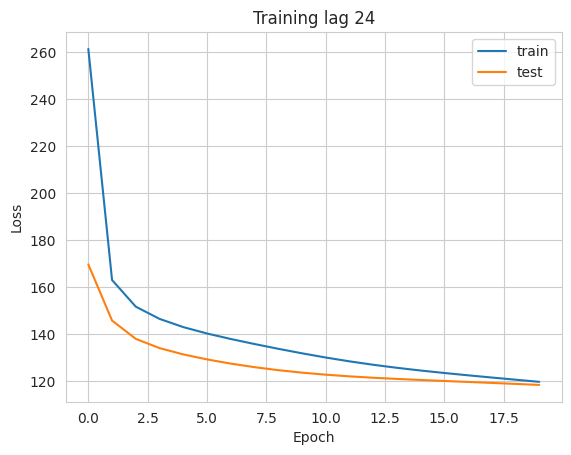

107/107 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

Mean Square Error      = [118.29982]
Root Mean Square Error = 10.87657206781112
Mean Absolute Error    = [5.889458]
Median Absolute Error  = [1.551427]
R^2                    = 0.6863788579298745
Adjusted R^2           = 0.6847116457156801


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

def Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=20, samples=24):
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
    model.add(Bidirectional(LSTM(samples, return_sequences=True)))
    model.add(Bidirectional(LSTM(samples)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_bidirectional_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)
    model = load_model('./models/' + filename)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.xlabel('Epoch')  # Add X label
    plt.ylabel('Loss')   # Add Y label
    plt.show()

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x if x > 0 else 0 for x in y_score]

    mse = mean_squared_error(y_test, y_score)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_score)
    medae = median_absolute_error(y_test, y_score)
    r2 = r2_score(y_test, y_score)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print_metrics(y_test, y_score, X_train.shape[2])

    return mse, rmse, mae, medae, r2, adjusted_r2

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test)


In [ ]:
model_results = []

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import pandas as pd
import time
import math

# Assuming you have the necessary data loaded (X_train, y_train, X_test, y_test)

model_results = []

def print_metrics(y_true, y_pred, num_features):
    # Your print_metrics function implementation
    pass

def Bidirectional_LSTM_model(X_train, y_train, X_test, y_test, batch_size_=12, dropout_=0.2, epochs_=20, samples=24):
    # design network
    model = Sequential()
    model.add(Bidirectional(LSTM(samples, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
    model.add(Bidirectional(LSTM(samples, return_sequences=True)))
    model.add(Bidirectional(LSTM(samples)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit network
    history = model.fit(X_train, y_train, epochs=epochs_, batch_size=batch_size_,
                        validation_data=(X_test, y_test), verbose=1, shuffle=False)

    # Save model for later
    filename = str(int(time.time())) + '_bidirectional_model_' + str(samples) + '_lag.h5'
    model.save('./models/' + filename)

    # Calculate and print metrics
    y_score = model.predict(X_test)
    y_score = [x[0] if x[0] > 0 else 0 for x in y_score]

    mse = mean_squared_error(y_test, y_score)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_score)
    medae = median_absolute_error(y_test, y_score)
    r2 = r2_score(y_test, y_score)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print_metrics(y_test, y_score, X_train.shape[2])

    return filename, mse, rmse, mae, medae, r2, adjusted_r2

# Assuming you have X_train, y_train, X_test, and y_test from your previous code
filename, mse, rmse, mae, medae, r2, adjusted_r2 = Bidirectional_LSTM_model(X_train, y_train, X_test, y_test)

# Save results to the model_results list
model_results_dict = {
    'Algo': 'Bidirectional LSTM',
    'lag': 'NA',
    'dropout': 0.2,  # Add the dropout value used in the model
    'epochs': 20,    # Add the number of epochs used in the model
    'batch_size': 12,  # Add the batch size used in the model
    'loss': 'NA',
    'rmse': rmse,
    'power_gen_rmse': math.sqrt(rmse),
    'r2': r2,
    'model_filename': filename,
    'time_ran': int(time.time())
}

model_results.append(model_results_dict)


Epoch 1/20
852/852 [==============================] - 18s 9ms/step - loss: 265.9596 - val_loss: 172.2492
Epoch 2/20
852/852 [==============================] - 5s 6ms/step - loss: 163.9612 - val_loss: 145.9800
Epoch 3/20
852/852 [==============================] - 6s 7ms/step - loss: 151.6435 - val_loss: 137.8465
Epoch 4/20
852/852 [==============================] - 6s 7ms/step - loss: 146.2986 - val_loss: 133.9998
Epoch 5/20
852/852 [==============================] - 6s 7ms/step - loss: 142.6423 - val_loss: 131.4891
Epoch 6/20
852/852 [==============================] - 6s 7ms/step - loss: 139.7251 - val_loss: 129.5669
Epoch 7/20
852/852 [==============================] - 7s 8ms/step - loss: 137.2586 - val_loss: 128.0835
Epoch 8/20
852/852 [==============================] - 7s 8ms/step - loss: 135.0598 - val_loss: 126.8658
Epoch 9/20
852/852 [==============================] - 5s 6ms/step - loss: 132.9570 - val_loss: 125.7493
Epoch 10/20
852/852 [==============================] - 6s 7ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


107/107 [==============================] - 2s 3ms/step


In [ ]:
model_results

[{'Algo': 'Bidirectional LSTM',
  'lag': 'NA',
  'dropout': 0.2,
  'epochs': 20,
  'batch_size': 12,
  'loss': 'NA',
  'rmse': 10.804349364160553,
  'power_gen_rmse': 3.286997013104903,
  'r2': 0.6905308422405242,
  'model_filename': '1706304077_bidirectional_model_24_lag.h5',
  'time_ran': 1706304079}]

In [ ]:
import os
import pandas as pd

# Create 'result' directory if it doesn't exist
result_directory = './result'
if not os.path.exists(result_directory):
    os.makedirs(result_directory)

# Assuming new_res_df is a DataFrame with the data
new_res_df = pd.DataFrame(model_results)

# Save the DataFrame to CSV file in the 'result' directory
new_res_df.to_csv(os.path.join(result_directory, 'result.csv'), index=False)


In [ ]:
models_by_r2 = new_res_df.sort_values(by='r2', ascending=False)
models_by_r2.head()

,Algo,lag,dropout,epochs,batch_size,loss,rmse,power_gen_rmse,r2,model_filename,time_ran
0,Bidirectional LSTM,NA,0.2,20,12,NA,10.804349,3.286997,0.690531,1706304077_bidirectional_model_24_lag.h5,1706304079


In [ ]:
model_filename = models_by_r2['model_filename'].iloc[0]
if(model_filename.endswith('.pkl')):
    model = joblib.load('./models/'+ model_filename)
else:
    model = load_model('./models/'+ model_filename)

## Predicting weather forecast data

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [ ]:
df_forecast = pd.read_csv('/content/weather_forecast.csv')
df_forecast.head()

# Concat y_hat to dataframe for later
#     lstm_test = pd.concat([lstm_test, pd.DataFrame(yhat, columns=['yhat'], index=lstm_test.index)], axis=1)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,NaN,6.42,NaN,1008.45,NaN,0,NaN,NaN,NaN,268.6,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,NaN,6.28,NaN,1008.24,NaN,0,NaN,NaN,NaN,269.1,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,NaN,6.08,NaN,1007.90,NaN,0,NaN,NaN,NaN,269.7,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,NaN,5.74,NaN,1007.61,NaN,0,NaN,NaN,NaN,270.4,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,NaN,5.30,NaN,1007.51,NaN,0,NaN,NaN,NaN,271.3,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [ ]:
df_forecast.isna().sum()

Unnamed: 0                0
plant_id                  0
datetime_utc              0
datetime_local            0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64

In [ ]:
## drop columns having null values as we see above wind_chill, heat_index etc having larger null values
df_forecast = df_forecast.drop(columns=['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation','precip_type'])
df_forecast.shape

(648, 23)

In [ ]:
# del df_weather_actual['power']

In [ ]:
df_weather_actual.head(10)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at,power
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.74,1007.90,0.0,275.6,0.0,0.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.00
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.74,1008.12,0.0,275.6,0.0,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.00
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00
5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00
6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,177.0,2.52,3.74,1008.65,0.0,275.6,0.0,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.08
7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,4.77
8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,20.55
9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237.0,0.60,3.74,1009.95,0.0,275.6,0.0,0.0,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,32.90


In [ ]:
df_weather_actual.shape

(13619, 24)

In [ ]:
df_weather_actual_total = pd.concat([df_weather_actual, df_forecast], axis=0, sort=False).reset_index(drop=True)

In [ ]:
df_weather_actual_total.tail(10)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at,power
14257,638,1,2019-10-27 08:30:00,2019-10-27 14:00:00,0.0,32.40,32,0,7.83,323.0,3.57,3.76,1011.51,5.0,266.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28,NaN
14258,639,1,2019-10-27 09:30:00,2019-10-27 15:00:00,0.0,32.06,32,0,7.23,337.0,3.44,3.70,1010.58,3.0,266.5,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28,NaN
14259,640,1,2019-10-27 10:30:00,2019-10-27 16:00:00,0.0,32.01,32,0,7.26,343.0,3.01,3.43,1010.33,1.0,266.1,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28,NaN
14260,641,1,2019-10-27 11:30:00,2019-10-27 17:00:00,0.0,31.08,31,0,7.67,348.0,2.50,3.14,1010.47,0.0,265.4,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28,NaN
14261,642,1,2019-10-27 12:30:00,2019-10-27 18:00:00,0.0,29.41,29,0,10.03,348.0,2.11,2.96,1011.02,0.0,264.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN
14262,643,1,2019-10-27 13:30:00,2019-10-27 19:00:00,0.0,27.23,27,0,12.20,345.0,1.74,2.85,1011.70,0.0,264.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN
14263,644,1,2019-10-27 14:30:00,2019-10-27 20:00:00,0.0,25.23,25,0,12.06,353.0,1.39,2.73,1012.28,0.0,264.9,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN
14264,645,1,2019-10-27 15:30:00,2019-10-27 21:00:00,0.0,23.75,24,0,12.19,29.0,1.15,2.55,1012.67,0.0,264.6,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN
14265,646,1,2019-10-27 16:30:00,2019-10-27 22:00:00,0.0,22.86,23,1,12.50,92.0,1.03,2.33,1012.79,0.0,264.3,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN
14266,647,1,2019-10-27 17:30:00,2019-10-27 23:00:00,0.0,22.21,22,1,12.67,146.0,0.91,2.01,1012.85,0.0,262.8,0.0,0.0,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28,NaN


In [ ]:
df_weather_actual_total.to_csv('weather_actual_total.csv')

In [ ]:
df_weather_actual_total = pd.read_csv('weather_actual_total.csv')


In [ ]:
print(df_weather_actual_total['icon'].unique())
Features_forecast_total = df_weather_actual_total['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features_forecast_total)
Features_forecast_total = enc.transform(Features_forecast_total)
print(Features_forecast_total)

['clear-night' 'fog' 'clear-day' 'partly-cloudy-day' 'partly-cloudy-night'
 'wind' 'cloudy' 'rain']
[1 3 3 ... 1 1 1]


In [ ]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_forecast_total.reshape(-1,1))
print(Features_forecast_total.reshape(-1,1))
Features_forecast_total = encoded.transform(Features_forecast_total.reshape(-1,1)).toarray()
Features_forecast_total[:10,:]

[[1]
 [3]
 [3]
 ...
 [1]
 [1]
 [1]]


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()


categorical_columns = ['humidity']

for col in categorical_columns:
    temp = encode_string(df_weather_actual_total[col])
    Features_forecast_total = np.concatenate([Features_forecast_total, temp], axis = 1)
    #print(Features)

print(Features_forecast_total.shape)
print(Features_forecast_total[:2,:])

(14267, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [ ]:
Features_forecast_total = np.concatenate([Features_forecast_total, np.array(df_weather_actual_total[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])], axis = 1)
Features_forecast_total[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.6520e+01, 1.9460e+01, 3.0800e+02, 3.7400e+00, 1.0079e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.8780e+01, 2.0060e+01, 1.7700e+02, 3.7400e+00, 1.0096e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.0600e+00]])

In [ ]:
scaler = preprocessing.StandardScaler().fit(Features_forecast_total[:,10:])
Features_forecast_total[:,10:] = scaler.transform(Features_forecast_total[:,10:])
print(Features_forecast_total.shape)
Features_forecast_total[:10,:]

(14267, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.04881573,  0.82533537,  1.13017315, -0.18634421, -0.19471093,
        -0.53704436,  0.06291183, -0.28000661, -1.46711103],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.26863544,  0.89220688, -0.08343618, -0.18634421,  0.04844815,
        -0.53704436,  0.06291183, -0.28000661, -1.55080153],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.05465165,  0.88217616, -0.08343618, -0.18634421,  0.04844815,
        -0.53704436,  0.06291183, -0.28000661, -1.55080153],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.211

In [ ]:
if(model_filename.endswith('.h5')):
    Features_forecast_total = Features_forecast_total.reshape((Features_forecast_total.shape[0], 1,Features_forecast_total.shape[1]))
    # make a prediction
    res = model.predict(Features_forecast_total)
    # print(res)
    # sets floor for res
    res = [x[0] if x > 0 else 0 for x in res]
else:
    # make a prediction
    res = model.predict(Features_forecast_total)
    # print(res)
    # sets floor for res
    res = [x if x > 0 else 0 for x in res]

446/446 [==============================] - 3s 2ms/step


In [ ]:
# Concat res to dataframe for later
df_weather_actual_total = pd.concat([df_weather_actual_total, pd.DataFrame(res, columns=['predicted_power'], index=df_weather_actual_total.index)], axis=1)
df_weather_actual_total.head(10)

,Unnamed: 0.1,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,updated_at,power,predicted_power
0,0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.74,1007.90,0.0,275.6,0.0,0.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.00,0.000000
1,1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00,5.507575
2,2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00,1.762746
3,3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.74,1008.12,0.0,275.6,0.0,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.00,0.000000
4,4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00,0.543600
5,5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.00,0.543600
6,6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,177.0,2.52,3.74,1008.65,0.0,275.6,0.0,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.08,0.146315
7,7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,4.77,1.142736
8,8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,20.55,30.715919
9,9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237.0,0.60,3.74,1009.95,0.0,275.6,0.0,0.0,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,32.90,35.866741


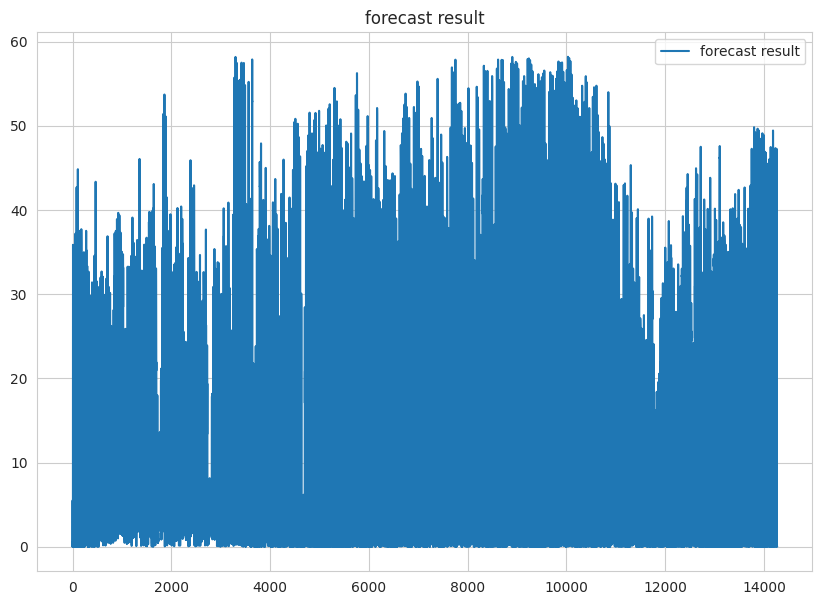

In [ ]:
plt.figure(figsize=(10,7), dpi=100)
plt.plot(res, label='forecast result')
plt.legend(loc=1)
plt.title('forecast result' )
plt.show()

In [ ]:
df_weather_actual_total.to_csv('weather_forecast_total_result.csv', index = False, header = True)

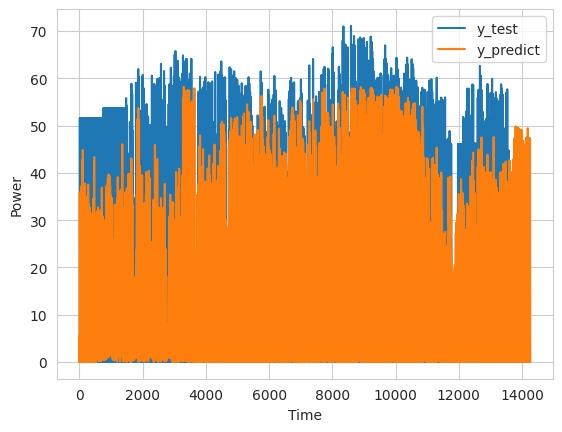

In [ ]:
df_weather_actual = pd.read_csv('weather_actuals_prepared1.csv')
test = [x for x in df_weather_actual['power']]
plot_res(test, res, label_test = 'y_test', label_score='y_predict')


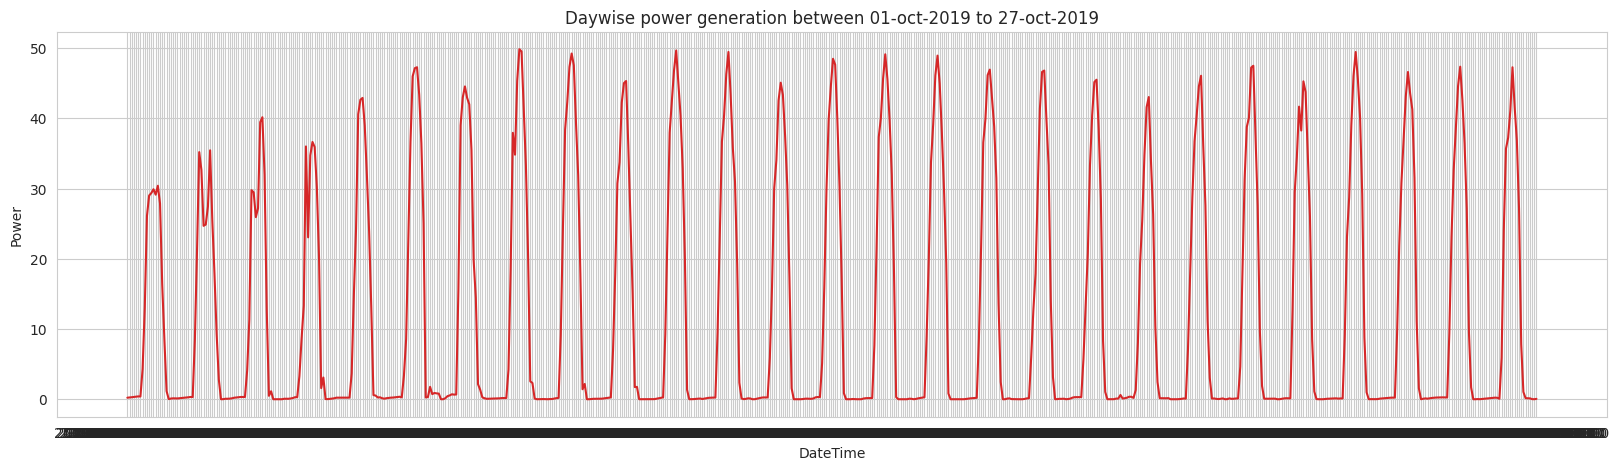

In [ ]:
df_forecast = pd.read_csv('/content/weather_forecast.csv')
start_date = '2019-10-01'
end_date = '2019-10-28'
mask = (df_weather_actual_total.datetime_local >= start_date) & (df_weather_actual_total.datetime_local <= end_date)
df_mask = df_weather_actual_total.loc[mask]
# print(df_mask)
plot_df(df_mask, x=df_mask.datetime_local, y=df_mask.predicted_power, title='Daywise power generation between 01-oct-2019 to 27-oct-2019')
df_forecast['power'] = [round(x,2) for x in df_mask.predicted_power]
df_forecast.to_csv('forecast_result.csv')